<img src="https://github.com/beata-faitli/Turtle-Games/blob/main/Turtle%20games%20logo.png?raw=true" alt="Turtle Games logo" width="200"/>

### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Table of Contents

1. [Scenario](#Scenario)
2. [Library Imports](#Library-imports)
3. [Linear regression using Python](#Linear-regression-using-Python)
    1. [Data Cleaning](#Data-Cleaning)
    2. [Exploratory Data Analysis](#Exploratory-data-analysis)
5. [Setting up the Notebook workflow](#Setting-up-the-Notebook-workflow)

<a id="Scenario"></a>
### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

<a id="Linear-regression-using-Python"></a>
# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

<a id="Library-imports"></a>
## 1. Library imports

In [7]:
# Standard library imports:
import os
import sys
import logging
import subprocess
import warnings
import re

# Third-party library imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE 
# sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression

# statsmodel libraries
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.graphics.gofplots import qqplot
from statsmodels.robust.robust_linear_model import RLM

In [8]:
# To print your directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\beata\OneDrive\Beata\DA Career Accelerator\Assignment 3 - R\Assignment_files


In [9]:
# set up logging and reduce warning messages

# Suppress FutureWarning
warnings.filterwarnings("ignore")

# Suppress informational messages
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# Set up logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s', handlers=[
    logging.StreamHandler()
])

In [10]:
# Functions to load and save data
# Define a function to load data
def load_data(file_path, file_type='csv'):
    try:
        if file_type == 'csv':
            df = pd.read_csv(file_path)
        elif file_type == 'excel':
            df = pd.read_excel(file_path)
        logging.info(f"Data loaded successfully from {file_path}")
        return df
    except Exception as e:
        logging.error(f"Error loading data from {file_path}: {str(e)}")
        return None

# Function to save results
def save_results(df, file_path):
    if df is None:
        logging.error(f"Cannot save results to {file_path}: DataFrame is None")
        return
    try:
        logging.info(f'Saving results to {file_path}')
        df.to_csv(file_path, index=False)
        logging.info(f'Successfully saved results to {file_path}')
    except Exception as e:
        logging.error(f"Error saving file to {file_path}: {str(e)}")
        raise

<a id="Data-Cleaning"></a>
## Sense Checking data and data cleaning

In [12]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [13]:
reviews.tail()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  
1995  The perfect word game for mixed ages (with Mom  
1996                                       Super fun  
1997                                      Great Game  
1998                                      Four Stars  
1999                                  Love this game

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


2024-08-28 10:23:18,196 - INFO - Data loaded successfully from turtle_reviews.csv
2024-08-28 10:23:18,196 - INFO - Sense checking data for turtle_reviews.csv
2024-08-28 10:23:18,196 - INFO - 
turtle_reviews.csv - Data Info:

2024-08-28 10:23:18,204 - INFO - 
turtle_reviews.csv - Data Shape: (2000, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  
1995  The perfect word game for mixed ages (with Mom  
1996                                       Super fun  
1997                                      Great Game  
1998                                      Four Stars  
1999                                  Love this game

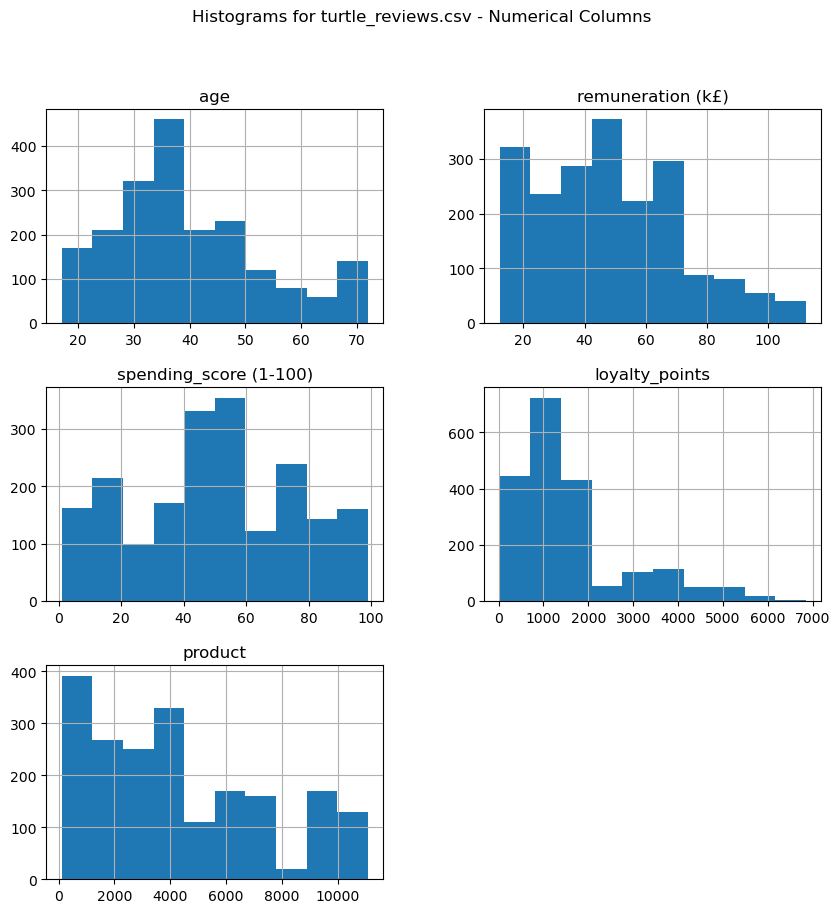

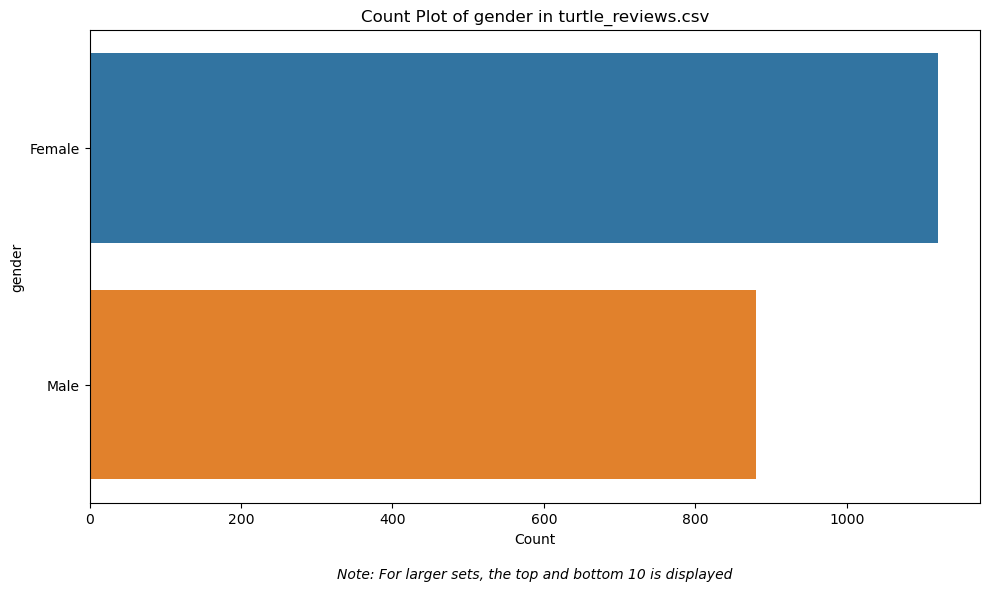

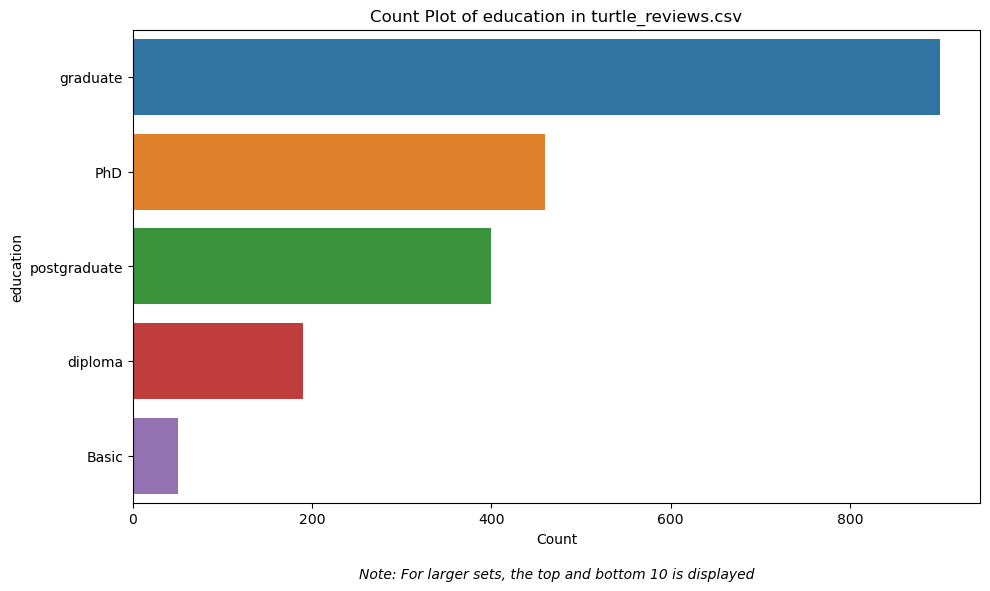

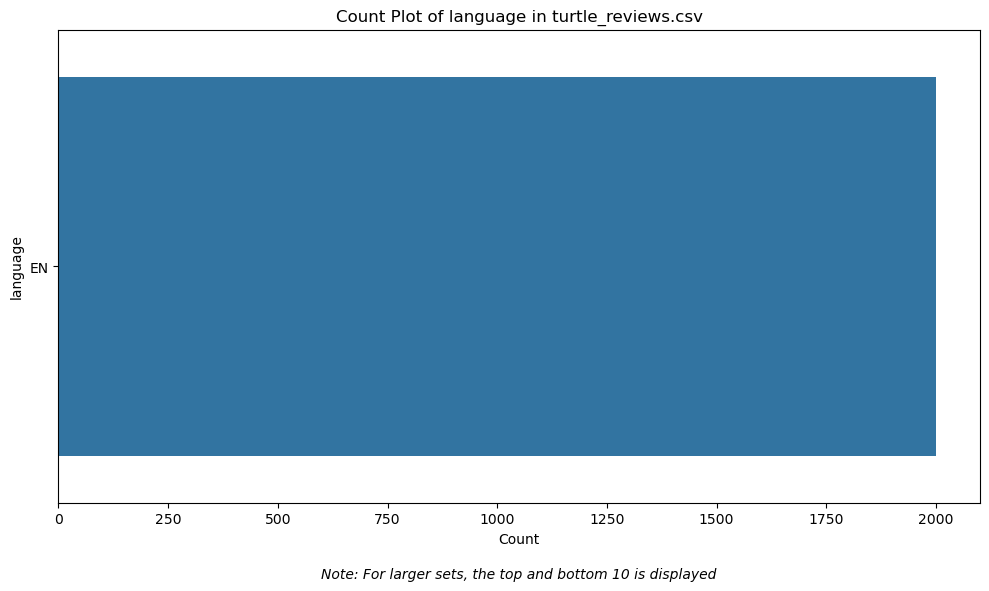

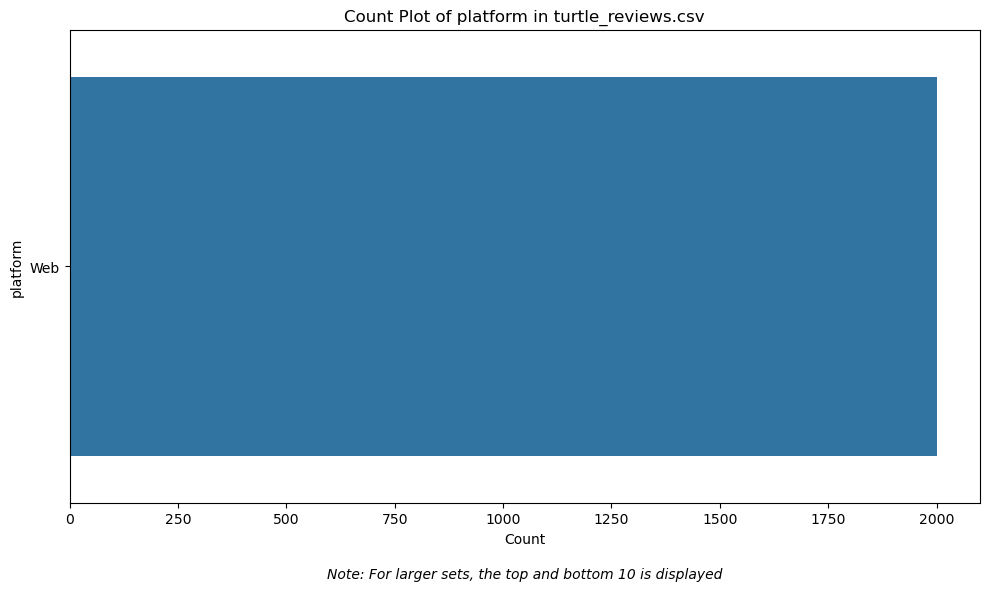

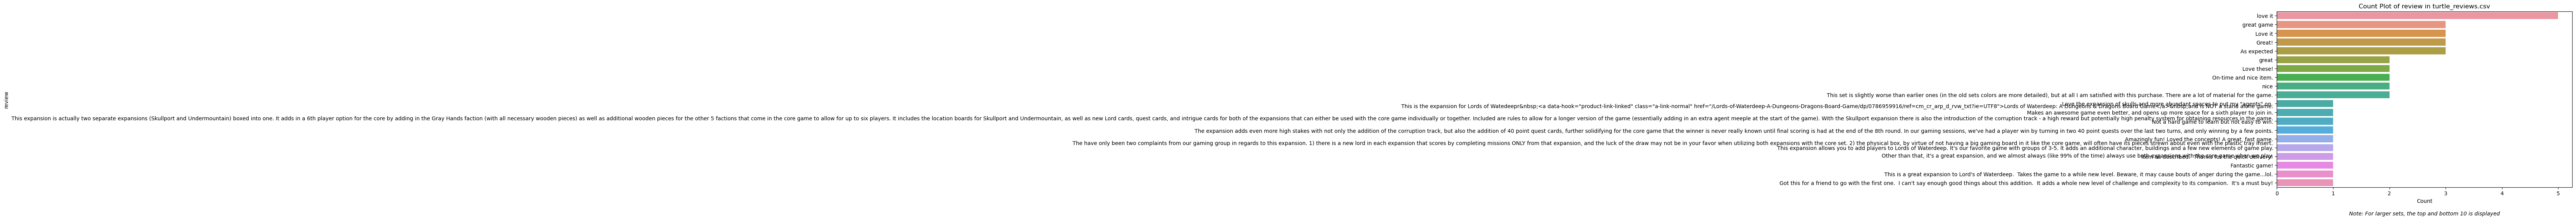

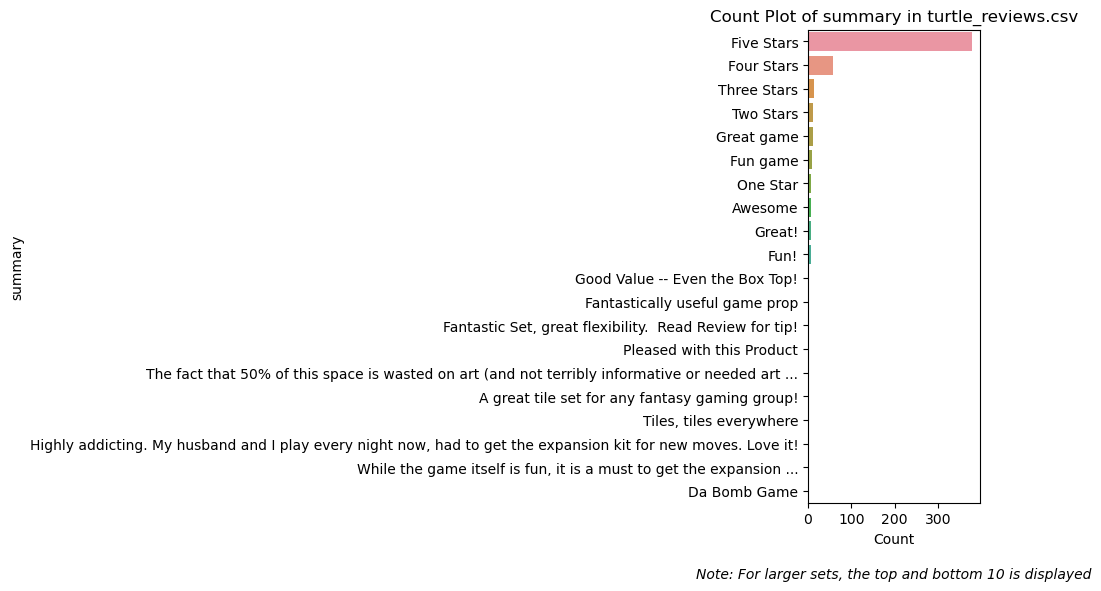

In [15]:
# Function to sense check data
def sense_check_data(df, file_name):
    try:
        logging.info(f"Sense checking data for {file_name}")
        logging.info(f"\n{file_name} - Data Info:\n")
        df.info()
        logging.info(f"\n{file_name} - Data Shape: {df.shape}")
        # logging.info(f"\n{file_name} - Data Description:\n{df.describe(include='all')}") 
        # If you would like to include the statistical description at this stage too.
        
        display(df.head())
        display(df.tail())

        # Plot histograms for numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if numerical_cols:
            df[numerical_cols].hist(figsize=(10, 10))
            plt.suptitle(f'Histograms for {file_name} - Numerical Columns')
            plt.show()

        # Plot count plots for non-numerical columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        if categorical_cols:
            for col in categorical_cols:
                # Get top 10 and bottom 10 unique values
                value_counts = df[col].value_counts()
                if len(value_counts) > 20:
                    top_10 = value_counts.nlargest(10)      # adjust the number if you want to see less or more value points in the visualisations
                    bottom_10 = value_counts.nsmallest(10).sort_values(ascending=False)
                    value_counts = pd.concat([top_10, bottom_10])

                plt.figure(figsize=(10, 6))
                sns.countplot(y=df[col], order=value_counts.index)
                plt.title(f'Count Plot of {col} in {file_name}')
                plt.xlabel('Count')
                plt.ylabel(col)
                
                # Add subtitle below the title
                plt.text(0.5, -0.15, 'Note: For larger sets, the top and bottom 10 is displayed',
                         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic')

                plt.tight_layout()
                plt.show()

    except Exception as e:
        logging.error(f"Error during sense check for {file_name}: {str(e)}")

# Main workflow
def main():
    file_names = ['turtle_reviews.csv']

    for file_name in file_names:
        file_type = 'excel' if file_name.endswith('.xlsx') else 'csv'
        df = load_data(file_name, file_type=file_type)
        if df is not None:
            sense_check_data(df, file_name)

if __name__ == "__main__":
    main()

- Age Distribution
Observation: The age distribution appears to be somewhat bimodal, with peaks around 30-40 years and a smaller peak around 60-70 years. There are relatively few individuals in the younger and older age brackets.
Implication: Since the distribution is not perfectly normal and has some distinct modes, the effect of age on loyalty points might not be linear. We might consider splitting age into categorical bands or introducing interaction terms if age interacts with other variables.
- Remuneration (Income) Distribution
Observation: The distribution of income is left-skewed, with a majority of individuals earning between 20k and 80k. There are fewer individuals earning above 80k.
Implication: The left-skewness suggests that a transformation (e.g., logarithmic transformation) might help normalize the data and improve the model's performance. This can also help mitigate the effect of extreme values in the higher income brackets.
- Loyalty Points Distribution
Observation: The loyalty points distribution is highly right-skewed, with a large number of individuals clustered around lower loyalty points, particularly between 0 and 2000, and a long tail extending towards higher values.
Implication: The right-skewness indicates that a transformation (e.g., log or square root) might help normalize the distribution. Since linear regression assumes normally distributed errors, transforming the dependent variable can lead to better model performance.
- Spending Score Distribution
Observation: The spending score is relatively uniformly distributed with some peaks, indicating that individuals are evenly spread across different spending scores, with slightly more individuals around 40-60.
Implication: The spending score distribution looks fairly balanced, so no transformation may be needed here. However, we may want to explore interactions with other variables (e.g., how spending score and income together affect loyalty points).

In [17]:
# Data Cleaning Functions
# Function to remove blank spaces in the data
def clean_data(df, file_name):
    try:
        logging.info(f'\nCleaning data in {file_name}')
        logging.info(f"Shape before cleaning: {df.shape}")
        df.columns = df.columns.str.strip()
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        logging.info(f"Shape after cleaning: {df.shape}")
        return df
    except Exception as e:
        logging.error(f"Error cleaning data for {file_name}: {str(e)}")
        return df 
        
# Function to check missing values
def check_missing_values(df, file_name):
    logging.info(f'\nChecking for missing values in {file_name}')
    missing_values = df.isnull().sum()
    logging.info(f'\nMissing values in {file_name}:\n{missing_values}\n')
    return missing_values

# Checking for duplicate values, adding a new column, where 1=duplicate, 0=not duplicate
def add_duplicate_flag(df, file_name):
    logging.info(f"Adding duplicate flag. DataFrame shape before: {df.shape}")
    try:
        df['duplicate_flag'] = 0  # Initialize the flag column with 0
        df.loc[df.duplicated(keep=False), 'duplicate_flag'] = 1
        logging.info(f"Duplicate flag added. DataFrame shape after: {df.shape}")
        return df
    except Exception as e:
        logging.error(f"Error adding duplicate flag: {str(e)}")
        return df  # Return the original DataFrame if the operation fails

# Main workflow
def main():
    file_names = ['turtle_reviews.csv']
    dataframes = {}
    
    for file_name in file_names:
        file_type = 'excel' if file_name.endswith('.xlsx') else 'csv'
        df = load_data(file_name, file_type=file_type)
        if df is not None:
            dataframes[file_name] = df
    
    reviews = dataframes.get('turtle_reviews.csv')

    # Log the shapes of the loaded data
    logging.info(f"Shape of review after loading: {reviews.shape if reviews is not None else 'None'}")

    # Clean data
    reviews = clean_data(reviews, 'turtle_reviews.csv')

    # Log the shapes of the cleaned data
    logging.info(f"Shape of reviews after cleaning: {reviews.shape if reviews is not None else 'None'}")

    # Check missing values
    check_missing_values(reviews, 'turtle_reviews.csv')

    reviews = add_duplicate_flag(reviews, 'turtle_reviews.csv')

    display(reviews.head())
    display(reviews.tail())
    
    save_results(reviews, 'turtle_reviews_cleaned.csv')

    logging.info("Data cleaning completed successfully.")

if __name__ == "__main__":
    main()

2024-08-28 10:23:21,446 - INFO - Data loaded successfully from turtle_reviews.csv
2024-08-28 10:23:21,446 - INFO - Shape of review after loading: (2000, 11)
2024-08-28 10:23:21,446 - INFO - 
Cleaning data in turtle_reviews.csv
2024-08-28 10:23:21,454 - INFO - Shape before cleaning: (2000, 11)
2024-08-28 10:23:21,467 - INFO - Shape after cleaning: (2000, 11)
2024-08-28 10:23:21,467 - INFO - Shape of reviews after cleaning: (2000, 11)
2024-08-28 10:23:21,467 - INFO - 
Checking for missing values in turtle_reviews.csv
2024-08-28 10:23:21,467 - INFO - 
Missing values in turtle_reviews.csv:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

2024-08-28 10:23:21,467 - INFO - Adding duplicate flag. DataFrame shape before: (2000

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  duplicate_flag  
0  The fact that 50% of this space is wasted on a...               0  
1  Another worthless Dungeon Master's screen from...               0  
2                    pretty, but also pretty useless               0  
3                                         Five Stars               0  
4                                         Money trap               0

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  duplicate_flag  
1995  The perfect word game for mixed ages (with Mom               0  
1996                                       Super fun               0  
1997                                      Great Game               0  
1998                                      Four Stars               0  
1999                                  Love this game               0

2024-08-28 10:23:21,519 - INFO - Saving results to turtle_reviews_cleaned.csv
2024-08-28 10:23:21,568 - INFO - Successfully saved results to turtle_reviews_cleaned.csv
2024-08-28 10:23:21,568 - INFO - Data cleaning completed successfully.


In [18]:
reviews = pd.read_csv('turtle_reviews_cleaned.csv')
reviews['duplicate_flag'].value_counts()

duplicate_flag
0    2000
Name: count, dtype: int64

Sense checking and cleaning results:
- No duplicate values found
- No missing values found

In [20]:
# Rename columns
reviews.rename(columns={'remuneration (k£)' : 'income', 'spending_score (1-100)': 'spending_score'}, inplace=True)

In [21]:
# Drop unnecesessary columns
reviews.drop(columns=['language', 'platform', 'duplicate_flag'], inplace=True)

In [22]:
reviews.head()

gender  age  income  spending_score  loyalty_points education  product  \
0    Male   18   12.30              39             210  graduate      453   
1    Male   23   12.30              81             524  graduate      466   
2  Female   22   13.12               6              40  graduate      254   
3  Female   25   13.12              77             562  graduate      263   
4  Female   33   13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [23]:
save_results(reviews, 'turtle_reviews_cleaned.csv')

2024-08-28 10:23:21,720 - INFO - Saving results to turtle_reviews_cleaned.csv
2024-08-28 10:23:21,780 - INFO - Successfully saved results to turtle_reviews_cleaned.csv


<a id="Exploratory-data-analysis"></a>
## Exploratory data analysis

2024-08-28 10:23:21,862 - INFO - Summary statistics for turtle_reviews:
2024-08-28 10:23:21,885 - INFO - 
Numerical summary statistics for turtle_reviews:
               age       income  spending_score  loyalty_points       product
count  2000.000000  2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000    48.079060       50.000000     1578.032000   4320.521500
std      13.573212    23.123984       26.094702     1283.239705   3148.938839
min      17.000000    12.300000        1.000000       25.000000    107.000000
25%      29.000000    30.340000       32.000000      772.000000   1589.250000
50%      38.000000    47.150000       50.000000     1276.000000   3624.000000
75%      49.000000    63.960000       73.000000     1751.250000   6654.000000
max      72.000000   112.340000       99.000000     6847.000000  11086.000000

2024-08-28 10:23:21,910 - INFO - 
Categorical summary statistics for turtle_reviews:
        gender education   review     summary
count     2

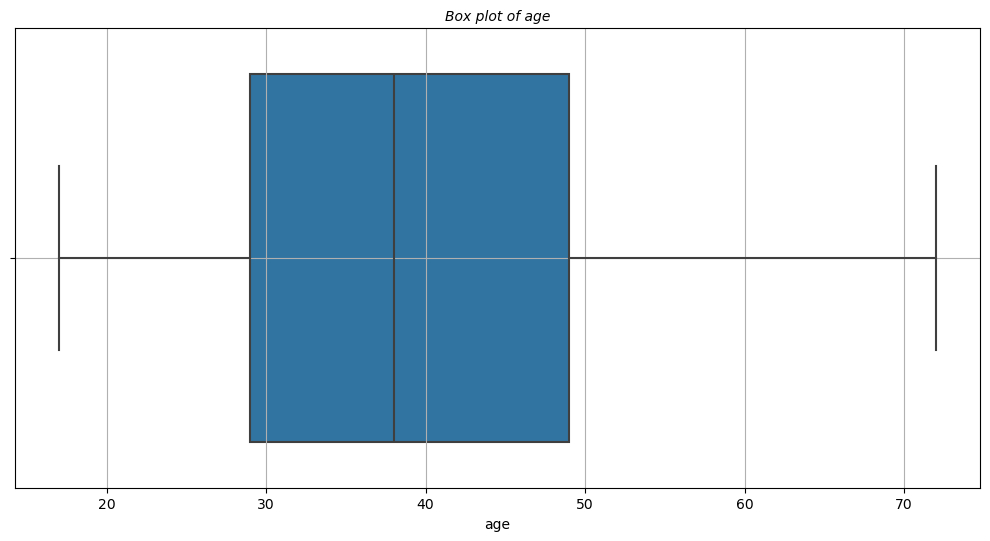

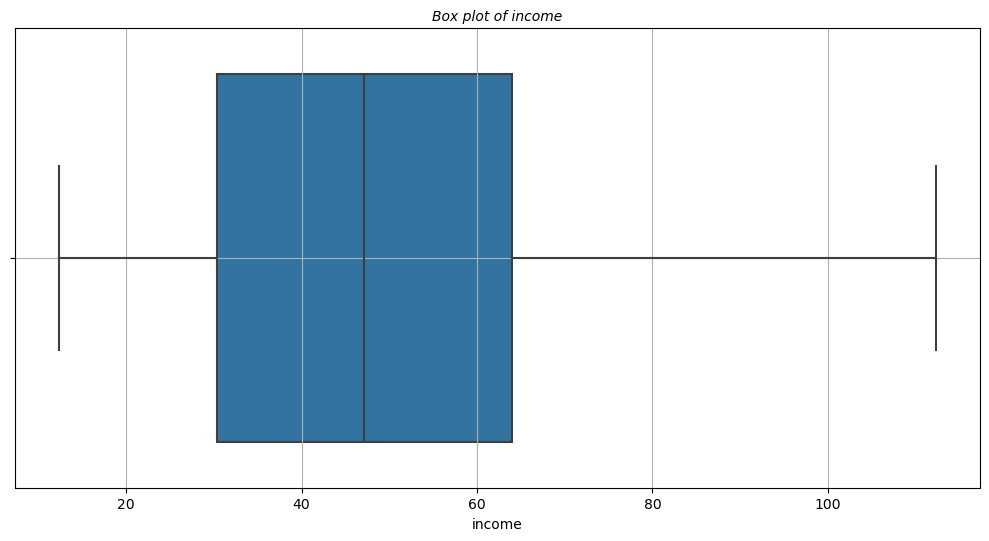

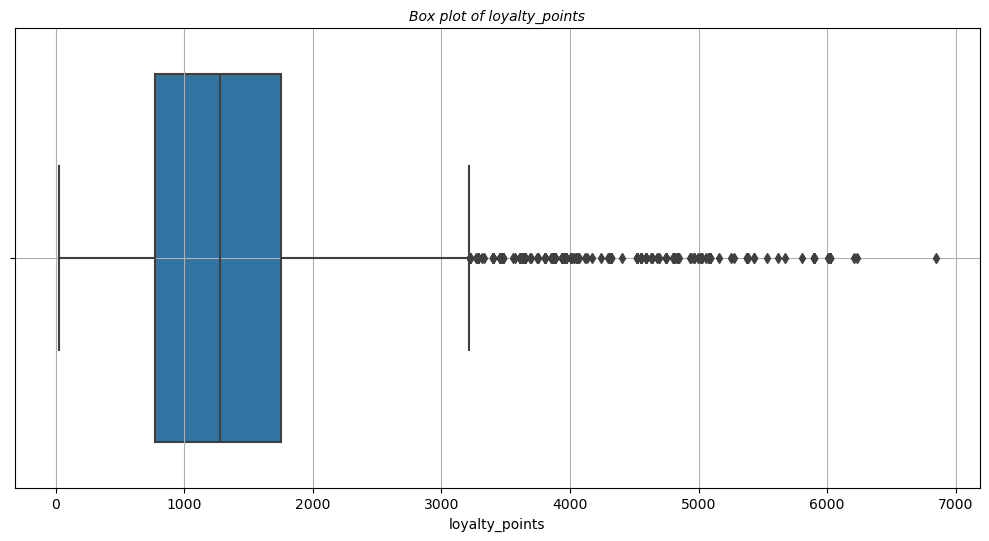

In [25]:
# Function to generate summary statistics
def generate_summary_statistics(df, file_name):
    logging.info(f'Summary statistics for {file_name}:')
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    if numerical_cols:
        logging.info(f'\nNumerical summary statistics for {file_name}:\n{df[numerical_cols].describe()}\n')
    if categorical_cols:
        logging.info(f'\nCategorical summary statistics for {file_name}:\n{df[categorical_cols].describe(include=["object", "category"])}\n')

# Function to plot boxplots
def plot_boxplots(df, columns):
    for column in columns:
        try:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column])

            # Main title
            plt.title(f'Box plot of {column}', fontsize=10, style='italic')

            # Customizing x-axis label
            plt.xlabel(f'{column}')

            # Adding grid for better readability
            plt.grid(True)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make sure everything fits without overlap
            plt.show()

        except Exception as e:
            logging.error(f"Error while plotting box plot for {column}: {str(e)}")

# Main workflow for EDA
def main():
    try:
        # Load cleaned data
        reviews = pd.read_csv('turtle_reviews_cleaned.csv')

        # Generate summary statistics
        generate_summary_statistics(reviews, 'turtle_reviews')

        # Plot boxplots
        columns_to_plot = ['age', 'income', 'loyalty_points']
        plot_boxplots(reviews, columns_to_plot)

    except Exception as e:
        logging.exception("An error occurred during EDA")

if __name__ == "__main__":
    main()

There are no outlier values detected in age and income. There are some outliers in the loyalty points. These will be removed to improve the predictive models. As spending score was an assigned value between 1-100, outlier values are not applicable and products are assigned product codes, therefore it would not be applicable to do outlier analysis. 

In [27]:
import pandas as pd
import logging

# Function to detect and remove outliers from a specific column
def detect_and_remove_outlier_values(df, column, file_name):
    """
    Detects and removes outliers in a specified numerical column of a DataFrame using the IQR method.
    
    Parameters:
    - df: DataFrame to analyze.
    - column: Column name to detect outliers.
    - file_name: Name of the file or dataset for logging purposes.

    Returns:
    - Cleaned DataFrame with outliers removed.
    - Dictionary with IQRLower, IQRUpper, and the number of outliers removed.
    """
    logging.info(f'\nOutlier detection and removal for {file_name} - {column}:')
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for detecting outliers
    IQRLower = Q1 - 1.5 * IQR
    IQRUpper = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < IQRLower) | (df[column] > IQRUpper)]
    
    # Log the details
    logging.info(f'Column: {column}')
    logging.info(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
    logging.info(f'IQRLower: {IQRLower}, IQRUpper: {IQRUpper}')
    logging.info(f'Number of outliers: {outliers.shape[0]}')
    
    # Remove outliers from the DataFrame
    df_cleaned = df[~((df[column] < IQRLower) | (df[column] > IQRUpper))]

    return df_cleaned, {
        'IQRLower': IQRLower,
        'IQRUpper': IQRUpper,
        'num_outliers_removed': outliers.shape[0]
    }

# Main workflow to remove outliers from 'loyalty_points' and save to a new file
def main():
    try:
        # Load the cleaned data
        reviews = pd.read_csv('turtle_reviews_cleaned.csv')
        
        # Detect and remove outliers from the 'loyalty_points' column
        cleaned_reviews, outlier_info = detect_and_remove_outlier_values(reviews, 'loyalty_points', 'cleaned_reviews.csv')
        
        # Save the cleaned DataFrame to a new CSV file
        cleaned_reviews.to_csv('turtle_reviews_no_outliers.csv', index=False)
        
        # Log the outcome
        logging.info(f"Outliers removed: {outlier_info['num_outliers_removed']}")
        logging.info("Cleaned data saved to 'turtle_reviews_no_outliers.csv'")
    
    except Exception as e:
        logging.exception("An error occurred during outlier detection and removal")

if __name__ == "__main__":
    main()


2024-08-28 10:23:22,729 - INFO - 
Outlier detection and removal for cleaned_reviews.csv - loyalty_points:
2024-08-28 10:23:22,730 - INFO - Column: loyalty_points
2024-08-28 10:23:22,737 - INFO - Q1: 772.0, Q3: 1751.25, IQR: 979.25
2024-08-28 10:23:22,737 - INFO - IQRLower: -696.875, IQRUpper: 3220.125
2024-08-28 10:23:22,737 - INFO - Number of outliers: 266
2024-08-28 10:23:22,785 - INFO - Outliers removed: 266
2024-08-28 10:23:22,785 - INFO - Cleaned data saved to 'turtle_reviews_no_outliers.csv'


In [28]:
reviews = pd.read_csv('turtle_reviews_no_outliers.csv')

# Perform min/max scaling on the data
#reviews.drop(columns = ['gender', 'education', 'product', 'review', 'summary'], inplace= True)
# Create a function, and set values.
# Normalise the data with the min-max feature scale.
#scaler = MinMaxScaler( )
#X = pd.DataFrame(scaler.fit_transform(reviews), columns=reviews.columns)
# View the values.
#X.head()
#sns.pairplot(X)

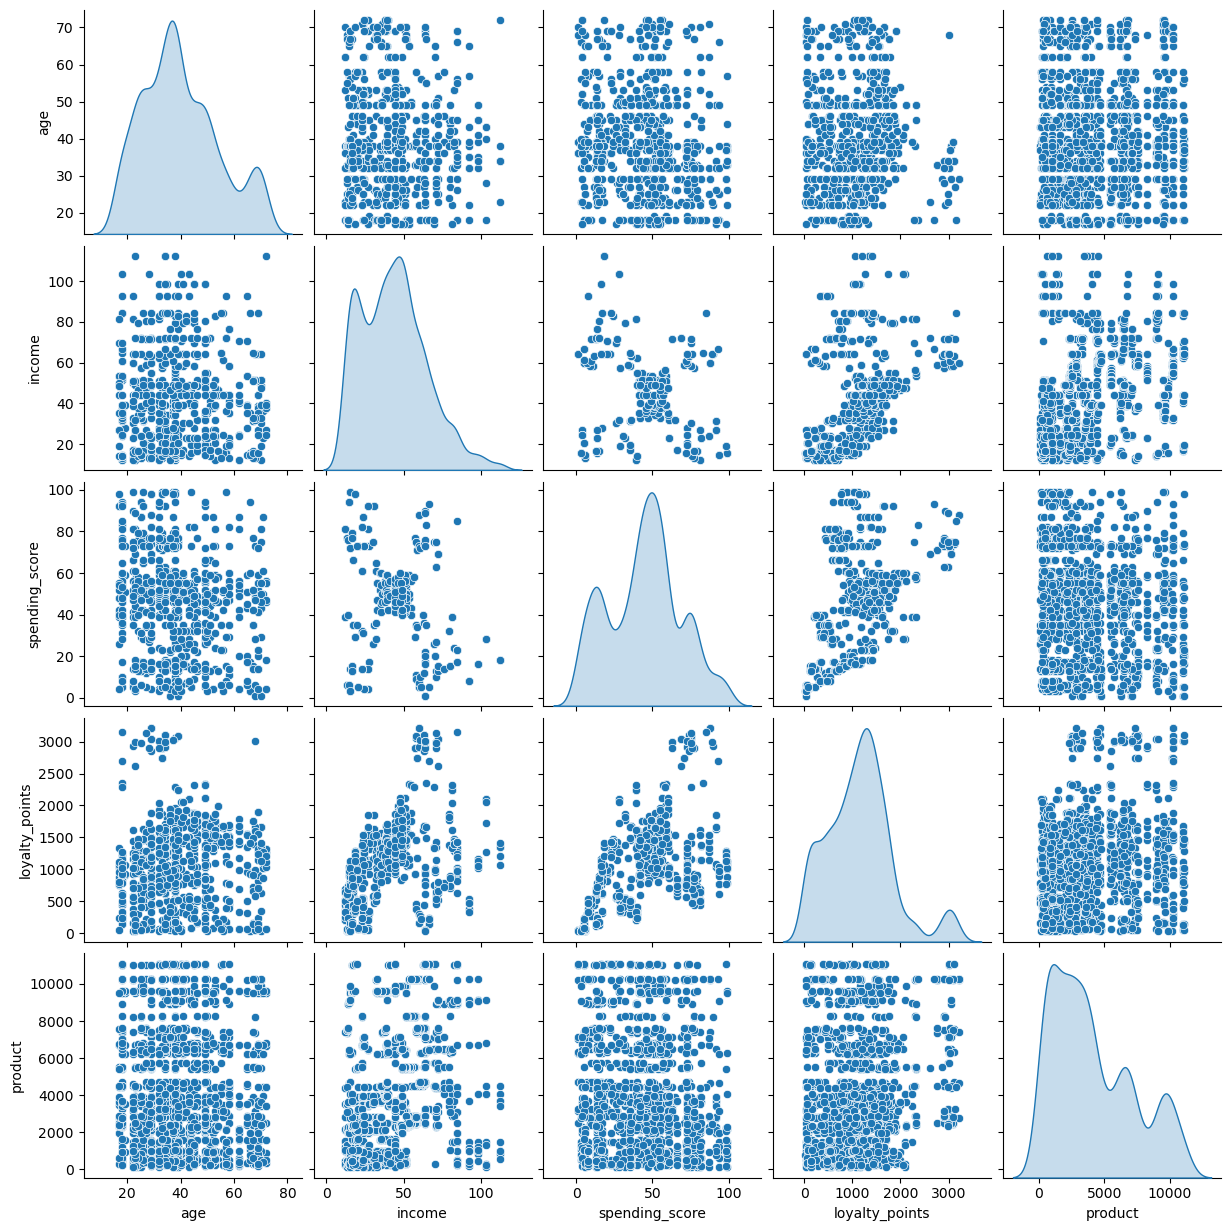

In [29]:
pairplot = sns.pairplot(reviews, diag_kind='kde')

### 5a) spending vs loyalty

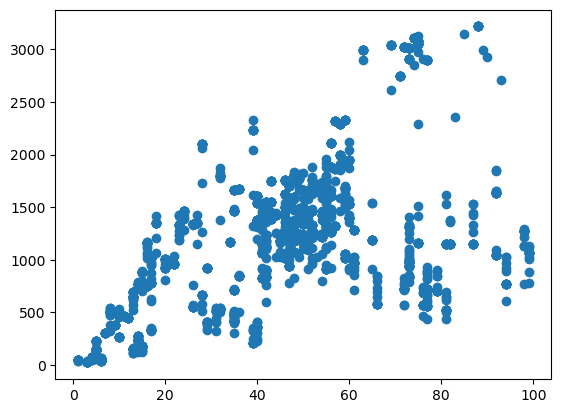

In [31]:
# Define independent variable. reshape values to fit model
x1 = reviews['spending_score'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x1, y)

In [32]:
# Create a linear regression model 
lr = LinearRegression()

# Fit the model.
lr.fit(x1, y) 

LinearRegression()

In [33]:
# Control the shuffling/avoid variation in values between variables. 
# Using 70% of the data for training and 30% for testing
# random_sate = 42 is used for reproducibility, may choose any other integer
x_train, x_test, y_train, y_test = train_test_split(x1, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [34]:
# Fit the model with the training data
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
# Predict the training set values.
y_pred = lr.predict(x_train) 

# View the output.
y_pred

array([[1612.55398918],
       [ 493.40026624],
       [1223.28312903],
       ...,
       [1061.0869373 ],
       [ 704.25531549],
       [1109.74579482]])

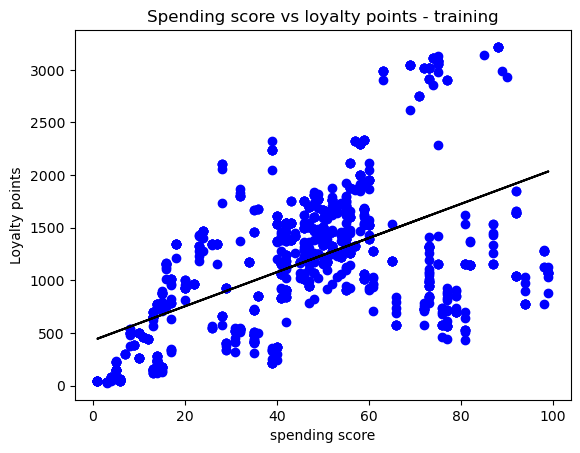

In [36]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'blue')  
plt.plot(x_train, y_pred, color = 'black')

# Set the title and legends for the graph.  
plt.title("Spending score vs loyalty points - training")
plt.xlabel("spending score")
plt.ylabel("Loyalty points") 

# Print the graph. 
plt.show() 

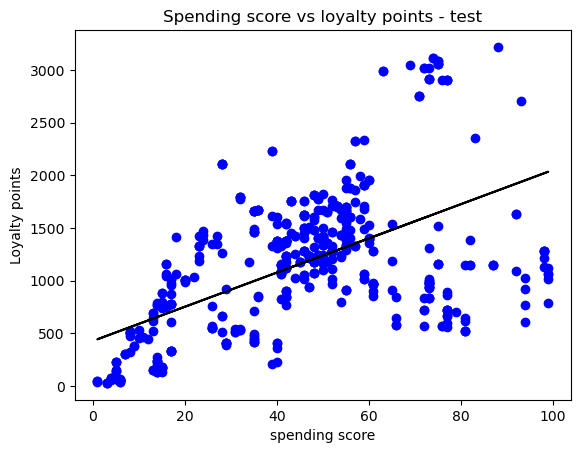

In [37]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color = 'black')
# Set the title and legends for the graph.  
plt.title("Spending score vs loyalty points - test")
plt.xlabel("spending score")
plt.ylabel("Loyalty points")

plt.show()

In [38]:
# Print the R-squared, intercept and coefficient value.
print("R-squared value: ", lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  0.26824027371138437
Intercept value:  [428.52178955]
Coefficient value:  [[16.21961917]]


The R-squared tells us that the model is explaining 26.82% of the training data.
The coefficient value of 16.21 tells us that as the spending score variable increases by 1, the predicted value of loyalty points increases by 16.21. The intercept is 428.

In [40]:
# predicted loyalty points for each sending_score
predictedloyalty = lr.predict([[5], [10], [15], [20], [25], [30], [35], [40], [45], [50], [60], [70], [80]])  

# Print the results.
print(f"Predicted Loyalty points:\n{predictedloyalty}")  

Predicted Loyalty points:
[[ 509.61988541]
 [ 590.71798128]
 [ 671.81607714]
 [ 752.91417301]
 [ 834.01226887]
 [ 915.11036474]
 [ 996.2084606 ]
 [1077.30655647]
 [1158.40465234]
 [1239.5027482 ]
 [1401.69893993]
 [1563.89513166]
 [1726.09132339]]


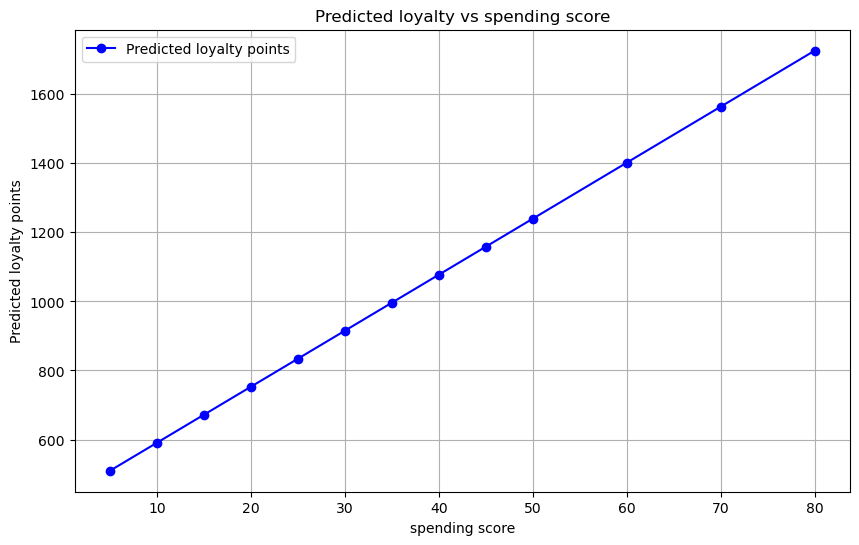

In [41]:
spending_score = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80]
# Plot the predicted loyalty points 
plt.figure(figsize=(10, 6))
plt.plot(spending_score, predictedloyalty, marker='o', color='b', label='Predicted loyalty points')

# Add labels and title
plt.xlabel('spending score')
plt.ylabel('Predicted loyalty points')
plt.title('Predicted loyalty vs spending score')

# Optionally add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [42]:
# Run the OLS test.
f = 'y ~ x1'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     741.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.94e-136
Time:                        10:23:34   Log-Likelihood:                -13468.
No. Observations:                1734   AIC:                         2.694e+04
Df Residuals:                    1732   BIC:                         2.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    450.9021     29.307     15.385      0.000     393.421     508.384
x1            15.7800      0.579     27.237      0.000      14.644      16.916
==============================================================================
Omnibus:                       51.429   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.291
Skew:                           0.428   Prob(JB):                     9.86e-13
Kurtosis:                       3.180   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the entire data the R squared is 0.30 - or the model explains 30% of the data or with other words 30% of the variance in loyalty points is explained by spending score or 70% of the variation in loyalty points is not explained by spending score in this model. The coefficient for the independent variable x (15.78) is highly significant (p-value < 0.001), indicating a strong relationship between x and the dependent variable. For each one-unit increase in x - spending point, the dependent variable (loyalty points) is expected to increase by about 16 units. 

Regression table: 
0       1066.3221
1       1729.0821
2        545.5821
3       1665.9621
4       1082.1021
          ...    
1729     719.1621
1730     813.8421
1731     577.1421
1732     703.3821
1733     577.1421
Name: spending_score, Length: 1734, dtype: float64


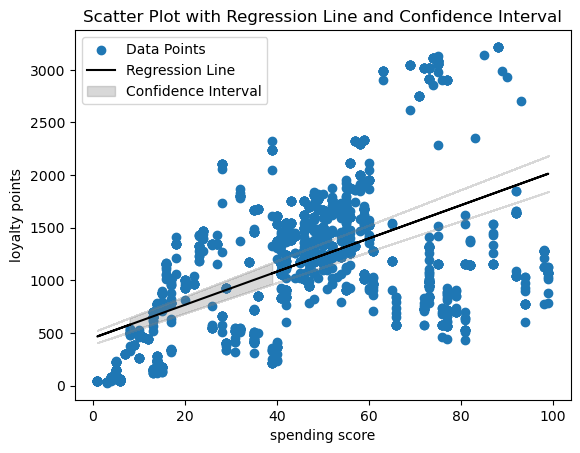

In [44]:
# using the OLS values create the OLS model manually with confidence intervals
x1 = reviews['spending_score']
y = reviews['loyalty_points']

# Manually set the regression coefficients from the OLS output
intercept = 450.9021
slope = 15.7800
intercept25 = 393.421
intercept95 = 508.384

# Manually set the confidence intervals for the slope
slope_lower = 14.644
slope_upper = 16.916

# Generate predicted values using the regression equation and print the regression table
predicted_y = intercept + slope * x1
print('Regression table: ')
print(predicted_y)

# Calculate the confidence interval bounds for the regression line
# Using the lower and upper confidence bounds for the slope
lower_bound = intercept25 + slope_lower * x1
upper_bound = intercept95 + slope_upper * x1

# Plot the data points (scatter plot)
plt.scatter(x1, y, label='Data Points')

# Plot the regression line
plt.plot(x1, predicted_y, color='black', label='Regression Line')

# Plot the confidence interval as a shaded area
plt.fill_between(x1, lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')

# Add labels, title, and legend
plt.xlabel('spending score')
plt.ylabel('loyalty points')
plt.title('Scatter Plot with Regression Line and Confidence Interval')
plt.legend()

# Show the plot
plt.show()


### 5b) renumeration (income) vs loyalty

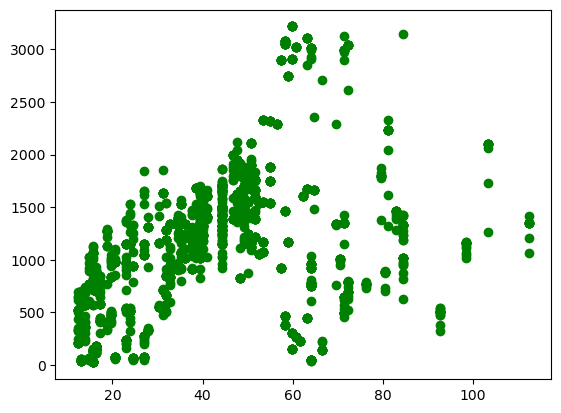

In [46]:
# Define independent variable. reshape values to fit model
x2 = reviews['income'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x2, y, color = 'green')

In [47]:
# Create a linear regression model 
lr = LinearRegression()

# Fit the model.
lr.fit(x2, y) 

LinearRegression()

In [48]:
# Control the shuffling/avoid variation in values between variables. 
# Using 70% of the data for training and 30% for testing
# random_sate = 42 is used for reproducibility, may choose any other integer
x_train, x_test, y_train, y_test = train_test_split(x2, y,
                                                    train_size=0.7,
                                                    random_state=42) 


In [49]:
# Fit the model with the training data
lr.fit(x_train, y_train)

LinearRegression()

In [50]:
# Predict the training set values.
y_pred = lr.predict(x_train) 

# View the output.
y_pred

array([[1427.33047335],
       [ 930.39549853],
       [1239.59948286],
       ...,
       [ 731.62150861],
       [1703.40545936],
       [1228.55648342]])

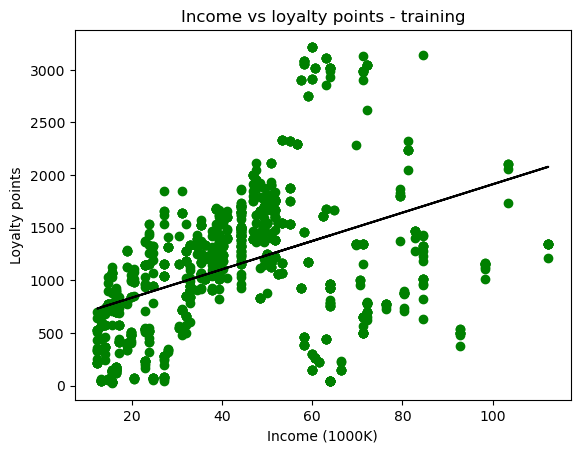

In [51]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'green')  
plt.plot(x_train, y_pred, color = 'black')

# Set the title and legends for the graph.  
plt.title("Income vs loyalty points - training")
plt.xlabel("Income (1000K)")
plt.ylabel("Loyalty points") 

# Print the graph. 
plt.show()

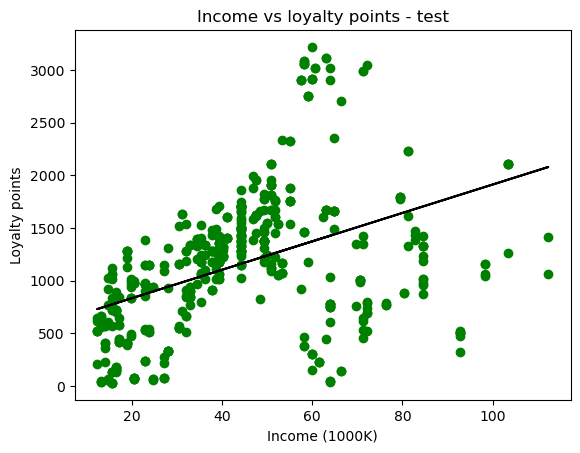

In [52]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, lr.predict(x_train), color = 'black')
# Set the title and legends for the graph.  
plt.title("Income vs loyalty points - test")
plt.xlabel("Income (1000K)")
plt.ylabel("Loyalty points")

plt.show()

In [53]:
# Print the R-squared, intercept and coefficient value.
print("R-squared value: ", lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  0.16733831698881452
Intercept value:  [565.976517]
Coefficient value:  [[13.46707249]]


The R-squared tells us that the model is explaining 16.73% of the data.
The coefficient value of 13.46 tells us that as the spending score variable increases by 1, the predicted value of loyalty points increases by 13.46.

In [55]:
# predicted loyalty points for new income
predictedloyalty2 = lr.predict([[10], [20], [30], [40], [50], [60], [70], [80], [90], [100], [110], [120], [130]])  

# Print the results.
print(f"Predicted Loyalty points:\n{predictedloyalty2}")  

Predicted Loyalty points:
[[ 700.64724188]
 [ 835.31796677]
 [ 969.98869165]
 [1104.65941653]
 [1239.33014141]
 [1374.0008663 ]
 [1508.67159118]
 [1643.34231606]
 [1778.01304094]
 [1912.68376583]
 [2047.35449071]
 [2182.02521559]
 [2316.69594047]]


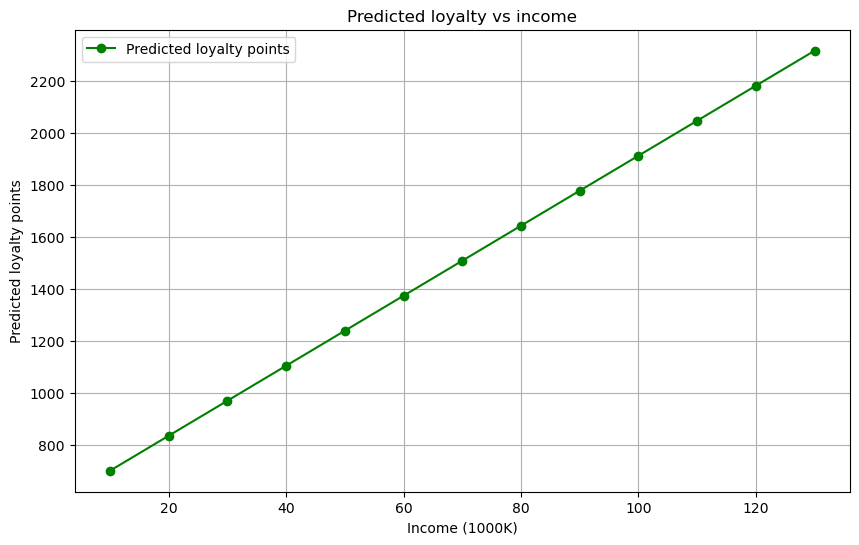

In [56]:
income = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
# Plot the predicted loyalty points 
plt.figure(figsize=(10, 6))
plt.plot(income, predictedloyalty2, marker='o', color='g', label='Predicted loyalty points')

# Add labels and title
plt.xlabel('Income (1000K)')
plt.ylabel('Predicted loyalty points')
plt.title('Predicted loyalty vs income')

# Optionally add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [57]:
# Run the OLS test.
f = 'y ~ x2'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     345.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.99e-70
Time:                        10:23:36   Log-Likelihood:                -13619.
No. Observations:                1734   AIC:                         2.724e+04
Df Residuals:                    1732   BIC:                         2.725e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    578.1120     34.526     16.744      0.000     510.395     645.829
x2            13.2294      0.712     18.582      0.000      11.833      14.626
==============================================================================
Omnibus:                       49.776   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.880
Skew:                           0.352   Prob(JB):                     9.93e-14
Kurtosis:                       3.578   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value for the whole data indicates that the model will explain 13.2% of the data or with other words 16.6% of the variance in loyalty points is explained by income or 86.8% of the variation in loyalty points is not explained by income in this model. With each 1000K increment in income will lead to 13.2 increase in loyalty points. 

Regression table: 
0        740.82870
1        740.82870
2        751.67648
3        751.67648
4        762.52426
           ...    
1729    1695.43334
1730    1695.43334
1731    1803.91114
1732    1879.84560
1733    1803.91114
Name: income, Length: 1734, dtype: float64


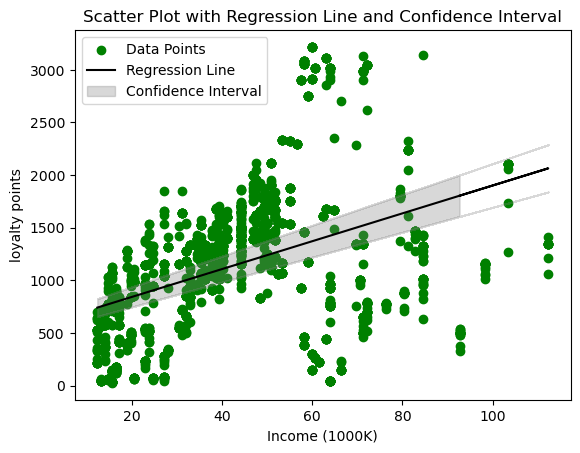

In [59]:
# using the OLS values create the OLS model manually with confidence intervals
x2 = reviews['income']
y = reviews['loyalty_points']

# Manually set the regression coefficients from the OLS output
intercept = 578.112
slope = 13.229
intercept25 = 510.395
intercept95 = 645.829

# Manually set the confidence intervals for the slope
slope_lower = 11.833
slope_upper = 14.626

# Generate predicted values using the regression equation and print the regression table
predicted_y = intercept + slope * x2
print('Regression table: ')
print(predicted_y)

# Calculate the confidence interval bounds for the regression line
# Using the lower and upper confidence bounds for the slope
lower_bound = intercept25 + slope_lower * x2
upper_bound = intercept95 + slope_upper * x2

# Plot the data points (scatter plot)
plt.scatter(x2, y, label='Data Points', color = 'green')

# Plot the regression line
plt.plot(x2, predicted_y, color='black', label='Regression Line')

# Plot the confidence interval as a shaded area
plt.fill_between(x2, lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')

# Add labels, title, and legend
plt.xlabel('Income (1000K)')
plt.ylabel('loyalty points')
plt.title('Scatter Plot with Regression Line and Confidence Interval')
plt.legend()

# Show the plot
plt.show()


### 5c) age vs loyalty

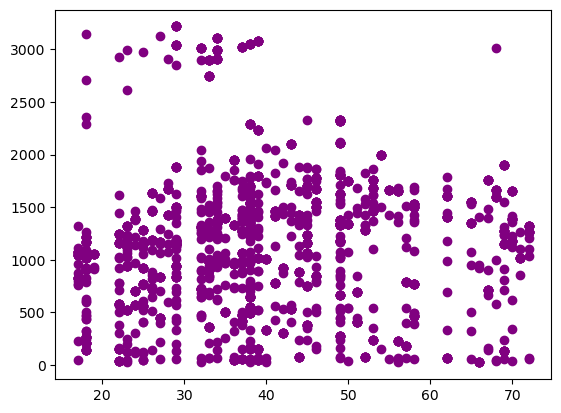

In [61]:
# Define independent variable. reshape values to fit model
x3 = reviews['age'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x3, y, color = 'purple')

In [62]:
# Create a linear regression model 
lr = LinearRegression()

# Fit the model.
lr.fit(x3, y)

LinearRegression()

In [63]:
# Control the shuffling/avoid variation in values between variables. 
# Using 70% of the data for training and 30% for testing
# random_sate = 42 is used for reproducibility, may choose any other integer
x_train, x_test, y_train, y_test = train_test_split(x3, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [64]:
# Fit the model with the training data
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
# Predict the training set values.
y_pred = lr.predict(x_train) 

# View the output.
y_pred

array([[1134.1222871 ],
       [1184.26905792],
       [1109.04890169],
       ...,
       [1099.01954753],
       [1119.07825585],
       [1139.13696418]])

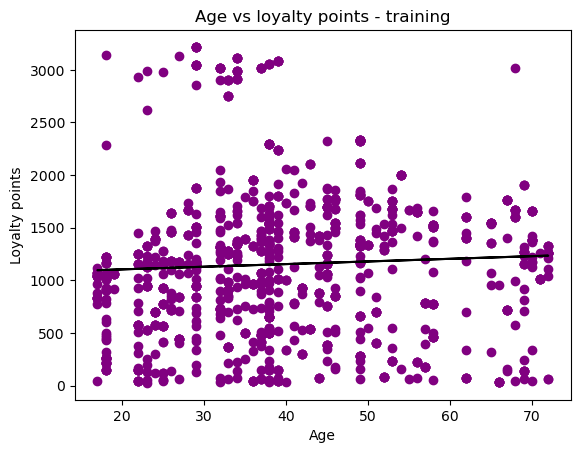

In [66]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'purple')  
plt.plot(x_train, y_pred, color = 'black')

# Set the title and legends for the graph.  
plt.title("Age vs loyalty points - training")
plt.xlabel("Age")
plt.ylabel("Loyalty points") 

# Print the graph. 
plt.show() 

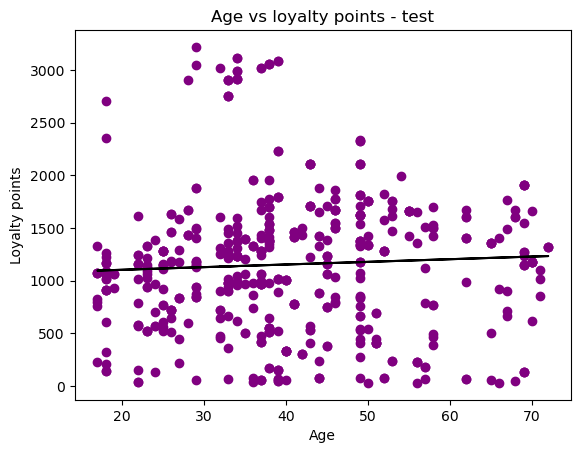

In [67]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'purple')
plt.plot(x_train, lr.predict(x_train), color = 'black')
# Set the title and legends for the graph.  
plt.title("Age vs loyalty points - test")
plt.xlabel("Age")
plt.ylabel("Loyalty points")

plt.show()

In [68]:
# Print the R-squared, intercept and coefficient value.
print("R-squared value: ", lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  -0.0008921530752459272
Intercept value:  [1053.88745379]
Coefficient value:  [[2.50733854]]


The R-squared tells us that the test model is explaining 0.0089 % of the data.
The coefficient value of 2.5 tells us that as the customers age increases by 1, the predicted value of loyalty points increases by 2.5

In [70]:
# predicted loyalty points for new age
predictedloyalty3 = lr.predict([[20], [30], [40], [50], [60], [70], [80]])  

# Print the results.
print(f"Predicted Loyalty points:\n{predictedloyalty3}") 

Predicted Loyalty points:
[[1104.03422461]
 [1129.10761002]
 [1154.18099543]
 [1179.25438084]
 [1204.32776625]
 [1229.40115165]
 [1254.47453706]]


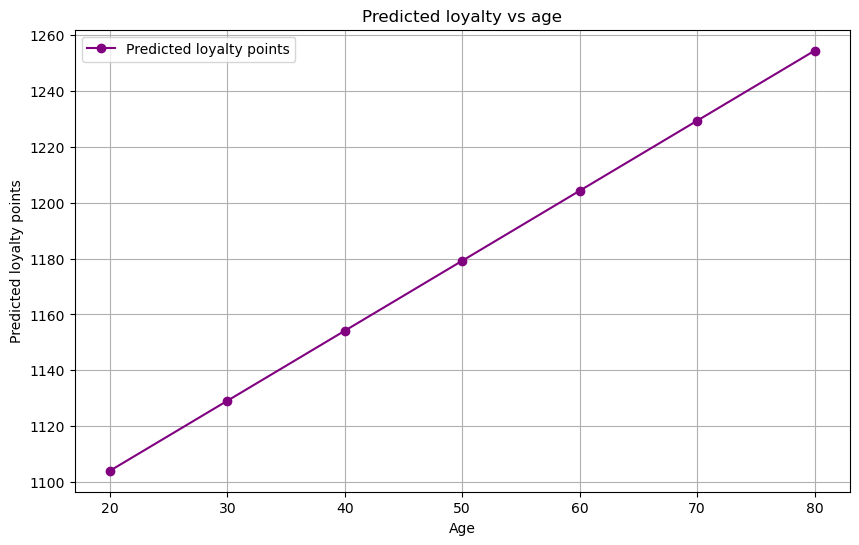

In [71]:
age = [ 20, 30, 40, 50, 60, 70, 80]
# Plot the predicted loyalty points 
plt.figure(figsize=(10, 6))
plt.plot(age, predictedloyalty3, marker='o', color='purple', label='Predicted loyalty points')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Predicted loyalty points')
plt.title('Predicted loyalty vs age')

# Optionally add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [72]:
# Run the OLS test.
f = 'y ~ x3'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.202
Date:                Wed, 28 Aug 2024   Prob (F-statistic):             0.0737
Time:                        10:23:38   Log-Likelihood:                -13775.
No. Observations:                1734   AIC:                         2.755e+04
Df Residuals:                    1732   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1073.7676     48.861     21.976      0.000     977.935    1169.600
x3             2.0617      1.152      1.789      0.074      -0.198       4.322
==============================================================================
Omnibus:                      144.941   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.128
Skew:                           0.692   Prob(JB):                     4.25e-43
Kurtosis:                       3.887   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value for the whole data indicates that the model will explain 0.2% of the data or with other words 0.2% of the variance in loyalty points is explained by customer's age or 99.8% of the variation in loyalty points is not explained by age in this model. With each year increase of the customer's age will lead to 2.06 increase in loyalty points. 

Regression table: 
0       1110.858
1       1121.163
2       1119.102
3       1125.285
4       1141.773
          ...   
1729    1145.895
1730    1166.505
1731    1162.383
1732    1143.834
1733    1139.712
Name: age, Length: 1734, dtype: float64


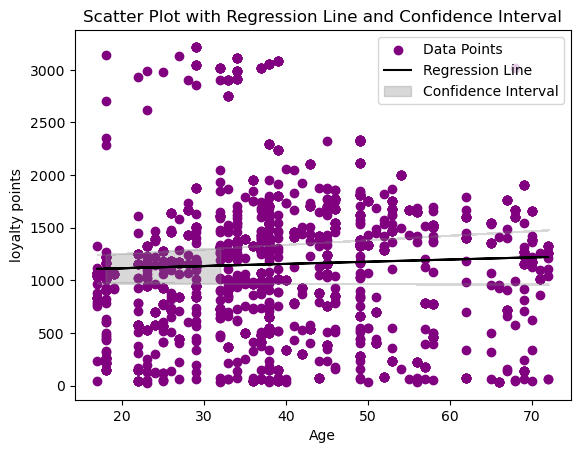

In [74]:
# using the OLS values create the OLS model manually with confidence intervals
x3 = reviews['age']
y = reviews['loyalty_points']

# Manually set the regression coefficients from the OLS output
intercept = 1073.76
slope = 2.061
intercept25 = 977.935
intercept95 = 1169

# Manually set the confidence intervals for the slope
slope_lower = -0.198
slope_upper = 4.322

# Generate predicted values using the regression equation and print the regression table
predicted_y = intercept + slope * x3
print('Regression table: ')
print(predicted_y)

# Calculate the confidence interval bounds for the regression line
# Using the lower and upper confidence bounds for the slope
lower_bound = intercept25 + slope_lower * x3
upper_bound = intercept95 + slope_upper * x3

# Plot the data points (scatter plot)
plt.scatter(x3, y, label='Data Points', color = 'purple')

# Plot the regression line
plt.plot(x3, predicted_y, color='black', label='Regression Line')

# Plot the confidence interval as a shaded area
plt.fill_between(x3, lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('loyalty points')
plt.title('Scatter Plot with Regression Line and Confidence Interval')
plt.legend()

# Show the plot
plt.show()

## 6. Observations and insights

Creating single linear regression models for the loyalty points vs spending score, age and income (remuneration) 13.2% of the variability in customer loyalty points is explained by the customer's income, 30% is explained by the customer's spending score and a very negligible 0.2% by the customer's age. Therefore it appears that other factors influence the costumer's loyalty points that are not captured by these variables. Considering this a multiple linear regression model could be created using the customer's income and spending score. Would not include age in the multilinear regression model due it's negligible impact

### Further analysis with multi-linear regressions and aiming to improve fitting of the model with log transformations

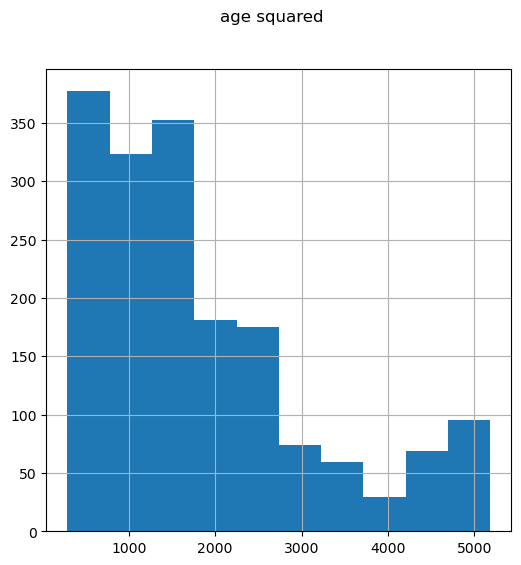

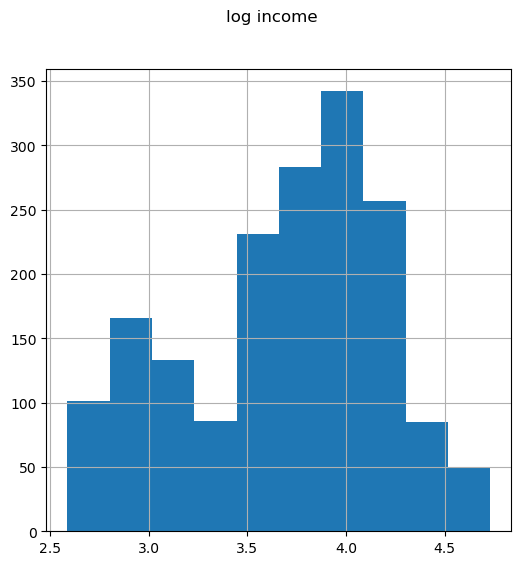

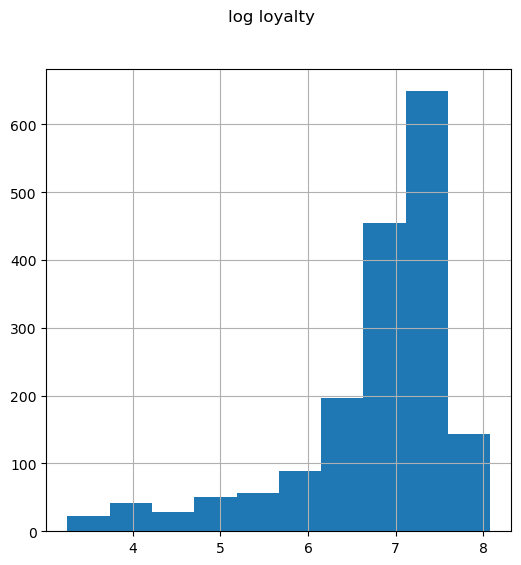

In [78]:
# Improving the underlying data's distribution
reviews = pd.read_csv('turtle_reviews_no_outliers.csv')

# Add polynomial terms for age (age^2)
reviews['age_squared'] = reviews['age'] ** 2

# 1. Log Transformation for 'income' and 'loyalty_points'
reviews['log_income'] = np.log(reviews['income'] + 1)  # Adding 1 to avoid log(0)
reviews['log_loyalty_points'] = np.log(reviews['loyalty_points'] + 1)

reviews['age_squared'].hist(figsize=(6, 6))
plt.suptitle('age squared') 
plt.show()

reviews['log_income'].hist(figsize=(6, 6))
plt.suptitle('log income') 
plt.show()

reviews['log_loyalty_points'].hist(figsize=(6, 6))
plt.suptitle('log loyalty') 
plt.show()

using the squared age and logarithmic transformation of income and loyalty points has not improved the distribution to normal.

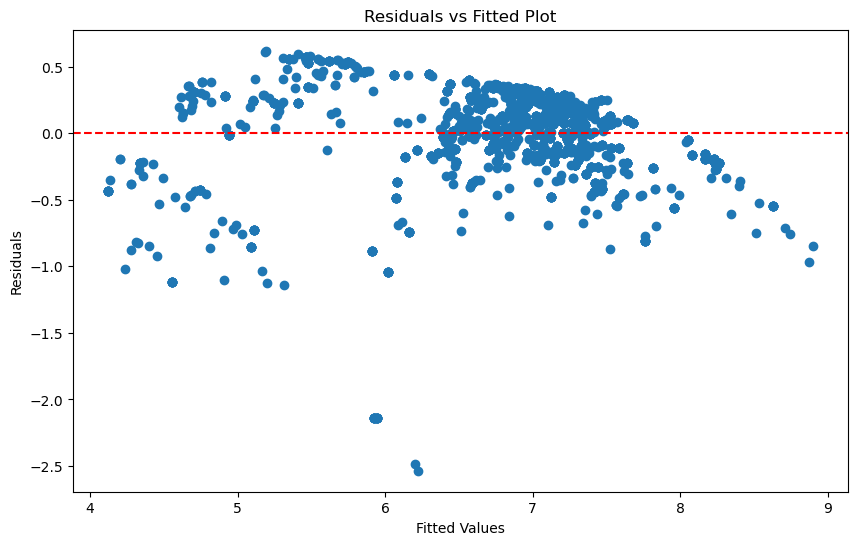

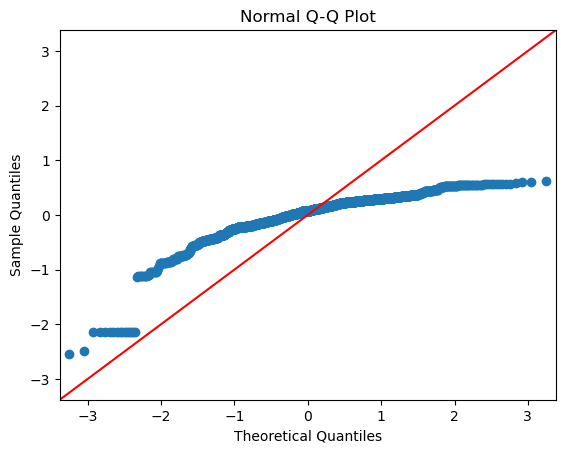

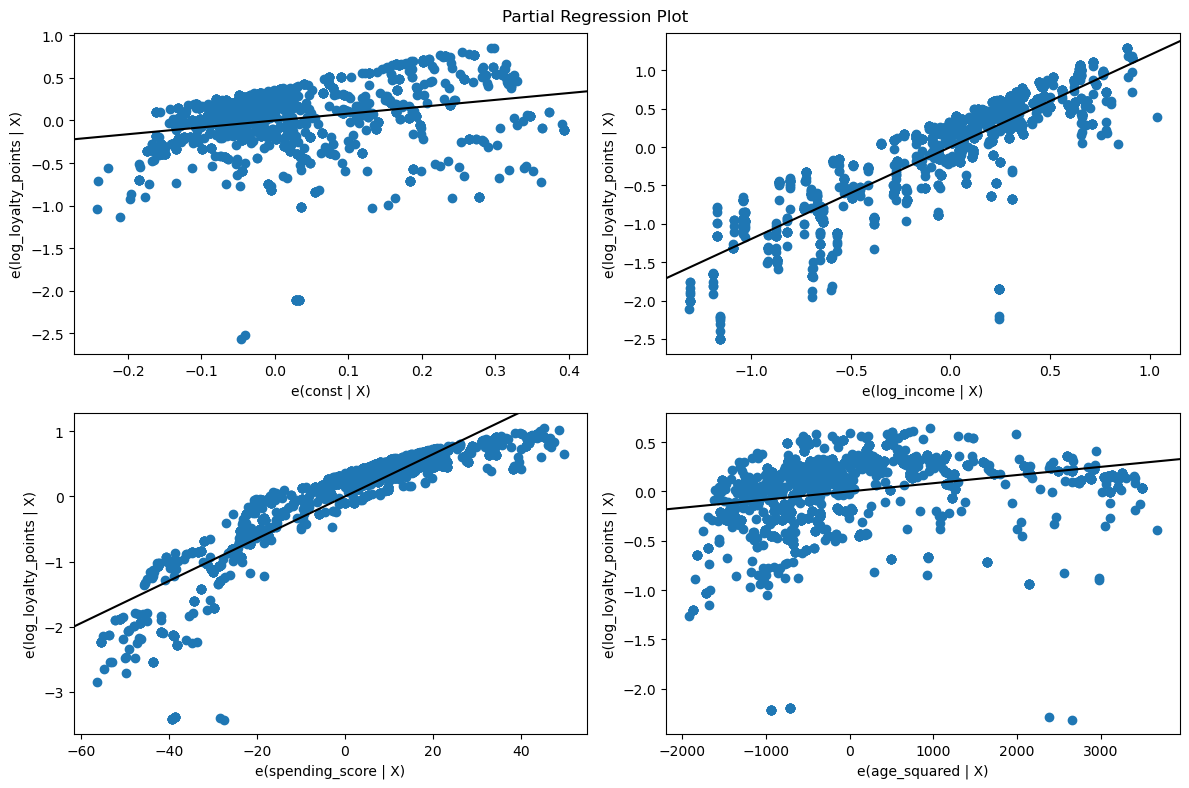

In [80]:
# Plotting the Q-Q and residuals plot for the transformed values.
# Step 1: Create new transformed variables
reviews['age_squared'] = reviews['age'] ** 2
reviews['log_income'] = np.log(reviews['income'])
reviews['log_loyalty_points'] = np.log(reviews['loyalty_points'])

# Step 2: Define the independent variables and the dependent variable
X = reviews[['log_income', 'spending_score', 'age_squared']]
y = reviews['log_loyalty_points']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the OLS model
model = sm.OLS(y, X).fit()

# Step 4: Residuals vs Fitted Plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

# Step 5: Q-Q Plot to check for normality of residuals
sm.qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# Step 6: Partial Regression Plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()


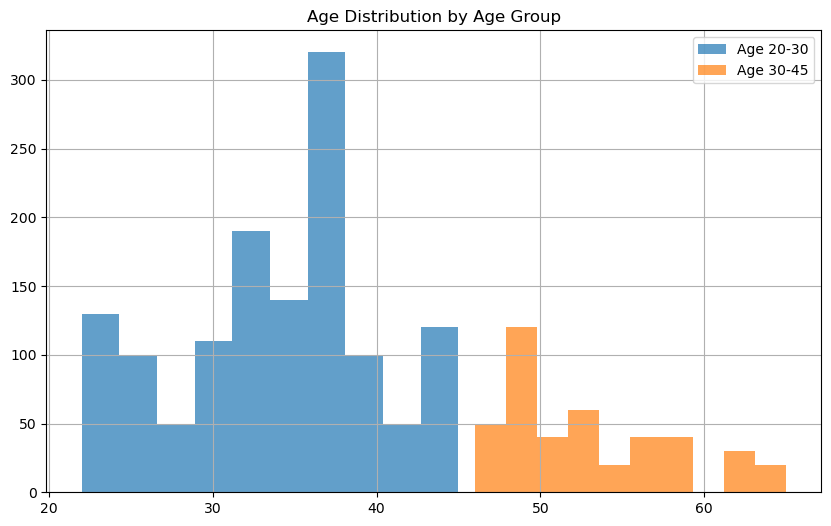

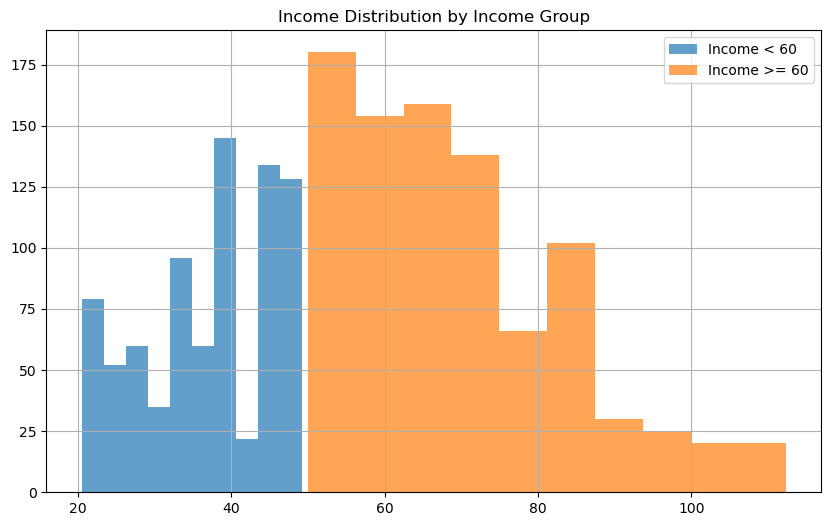

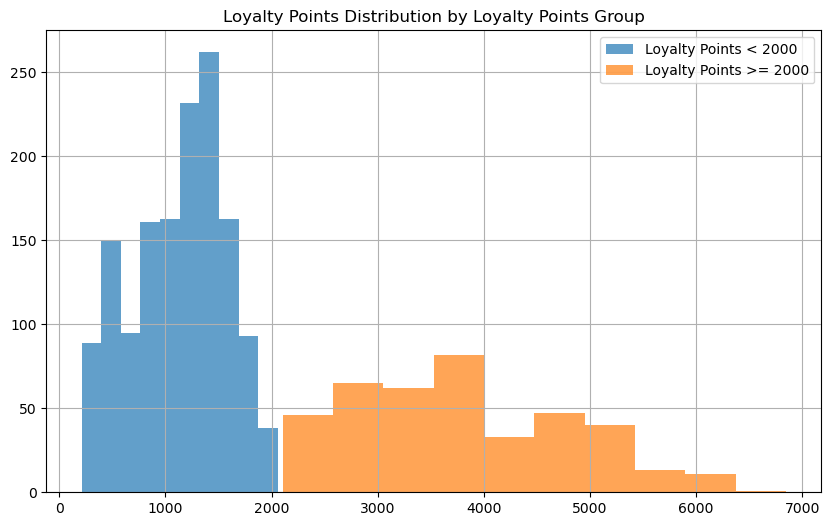

In [81]:
# Checking if certain grouping of the data improves the distribution
# Load data
reviews = pd.read_csv('turtle_reviews_cleaned.csv')

# Aiming for normal distribution groups
reviews['age_20_45'] = (reviews['age'] >= 20) & (reviews['age'] <= 45) 
reviews['age_45_70'] = (reviews['age'] > 45) & (reviews['age'] <= 65)
#reviews['age_45_60'] = (reviews['age'] > 45) & (reviews['age'] <= 60)

# aiming for normal distribution income groups
reviews['income_lower'] = (reviews['income'] >20) & (reviews['income'] < 50) 
reviews['income_upper'] = reviews['income'] >= 50 

# Creating two groups of loyalty points (excluding below 200 to improve the distribution curve
reviews['loyalty_points_lower'] = (reviews['loyalty_points'] > 200) & (reviews['loyalty_points'] < 2100)
reviews['loyalty_points_upper'] = reviews['loyalty_points'] >= 2100

# Visualize the distribution of continuous variables within each group using histograms

# Age 
plt.figure(figsize=(10, 6))

# Plotting the age distribution for each group
reviews[reviews['age_20_45']]['age'].hist(alpha=0.7, label='Age 20-30', bins=10)
reviews[reviews['age_45_70']]['age'].hist(alpha=0.7, label='Age 30-45', bins=10)
#reviews[reviews['age_45_60']]['age'].hist(alpha=0.7, label='Age 45-60', bins=10)

plt.title('Age Distribution by Age Group')
plt.legend()
plt.show()

# Income < 60 vs Income >= 60
plt.figure(figsize=(10, 6))
reviews[reviews['income_lower']]['income'].hist(alpha=0.7, label='Income < 60', bins=10)
reviews[reviews['income_upper']]['income'].hist(alpha=0.7, label='Income >= 60', bins=10)
plt.title('Income Distribution by Income Group')
plt.legend()
plt.show()

# Loyalty Points < 2000 vs Loyalty Points >= 2000
plt.figure(figsize=(10, 6))
reviews[reviews['loyalty_points_lower']]['loyalty_points'].hist(alpha=0.7, label='Loyalty Points < 2000', bins=10)
reviews[reviews['loyalty_points_upper']]['loyalty_points'].hist(alpha=0.7, label='Loyalty Points >= 2000', bins=10)
plt.title('Loyalty Points Distribution by Loyalty Points Group')
plt.legend()
plt.show()


Creating the groups still did not completely resolve the distribution of the data. The best impact was on the loyalty points, therefore we created two subset groups of the loyalty points. 

In [83]:
# Create the binary flags for loyalty points
reviews['loyalty_points_lower'] = (reviews['loyalty_points'] > 200) & (reviews['loyalty_points'] < 2100)
reviews['loyalty_points_upper'] = reviews['loyalty_points'] >= 2100

# Filter the dataset into two separate sets based on the flags
lower_loyalty_points_data = reviews[reviews['loyalty_points_lower']]
upper_loyalty_points_data = reviews[reviews['loyalty_points_upper']]

# Print the shapes of the datasets to verify the split
print("Lower loyalty points dataset shape:", lower_loyalty_points_data.shape)
print("Upper loyalty points dataset shape:", upper_loyalty_points_data.shape)

# Optional: Group the data by loyalty points category for further aggregation/analysis
#grouped_data = reviews.groupby(['loyalty_points_lower', 'loyalty_points_upper'])
#grouped_data.head()

lower_loyalty_points_data.head() 

Lower loyalty points dataset shape: (1446, 15)
Upper loyalty points dataset shape: (400, 15)


gender  age  income  spending_score  loyalty_points education  product  \
0    Male   18   12.30              39             210  graduate      453   
1    Male   23   12.30              81             524  graduate      466   
3  Female   25   13.12              77             562  graduate      263   
4  Female   33   13.94              40             366  graduate      291   
5  Female   24   13.94              76             573       PhD      977   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   
5                                     Grandson loves   

                                             summary  age_20_45  age_45_70  \
0  The fact that 50% of this space is wasted on a...      False      False   
1  Another worthless Dungeon Master's screen from...       True      False   
3                                         Five Stars       True      False   
4                                         Money trap       True      False   
5                                         Five Stars       True      False   

   income_lower  income_upper  loyalty_points_lower  loyalty_points_upper  
0         False         False                  True                 False  
1         False         False                  True                 False  
3         False         False                  True                 False  
4         False         False                  True                 False  
5         False         False                  True                 False

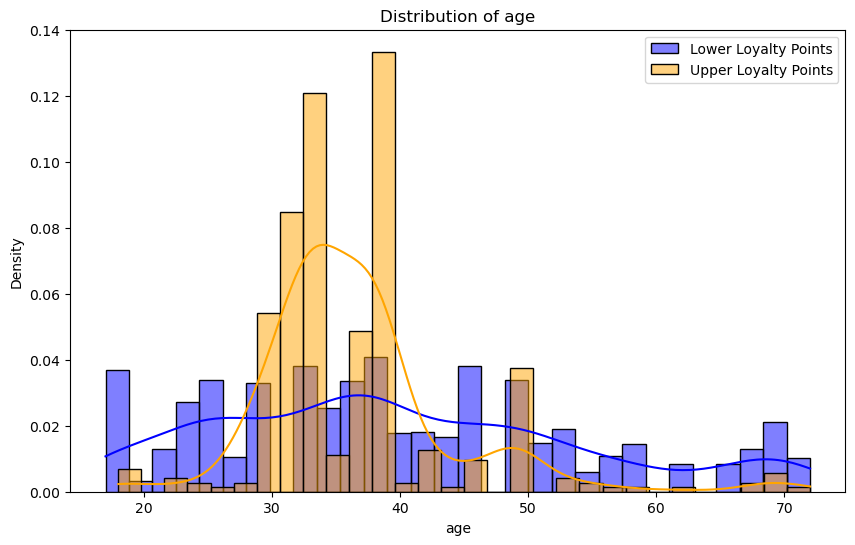

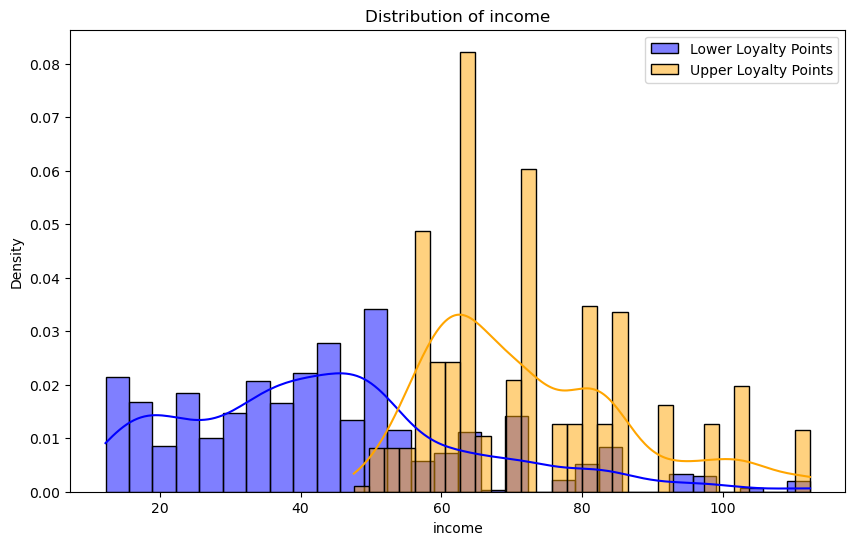

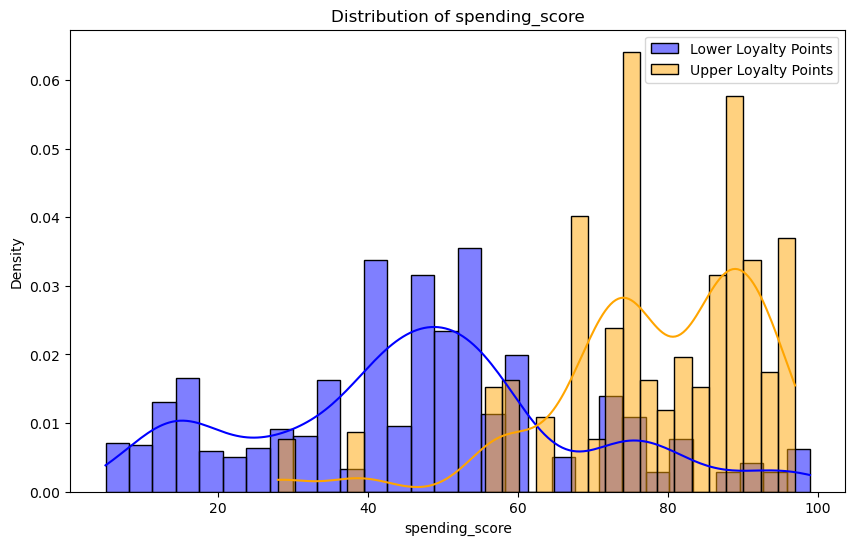

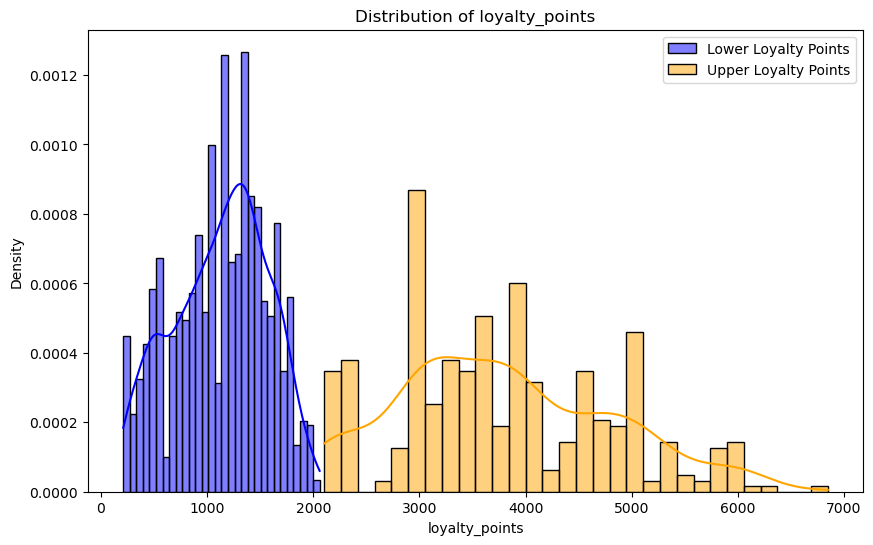

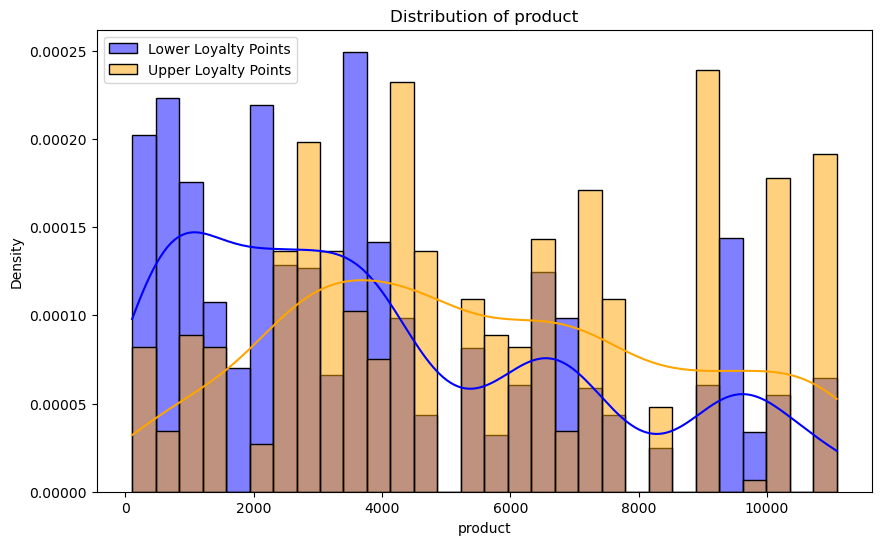

In [84]:
# Plot the distribution of the divided loyalty points dataset
# Identify numerical columns
numerical_cols = reviews.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Function to plot distributions for numerical variables
def plot_numerical_distribution(data_lower, data_upper, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        
        # Plot histograms for both lower and upper loyalty points groups
        sns.histplot(data_lower[col], color='blue', label='Lower Loyalty Points', kde=True, stat="density", bins=30, alpha=0.5)
        sns.histplot(data_upper[col], color='orange', label='Upper Loyalty Points', kde=True, stat="density", bins=30, alpha=0.5)
        
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

# Call the plotting functions
plot_numerical_distribution(lower_loyalty_points_data, upper_loyalty_points_data, numerical_cols)

The distribution of the underlying data for both the upper and lower bands of the loyalty points is not entirely normal. 

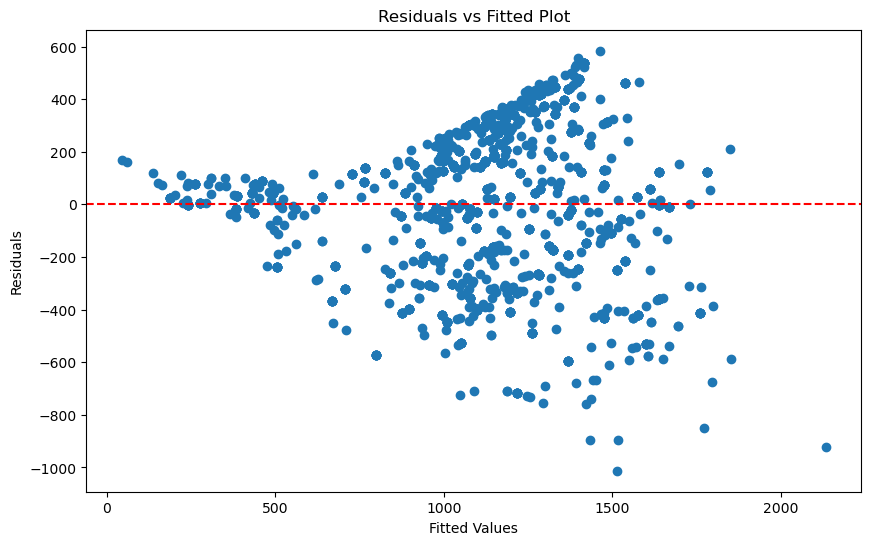

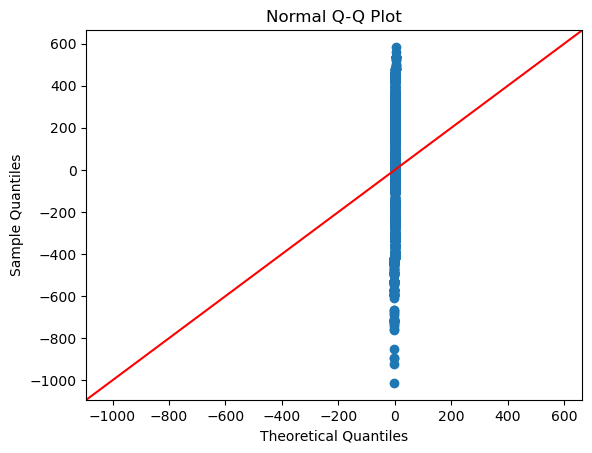

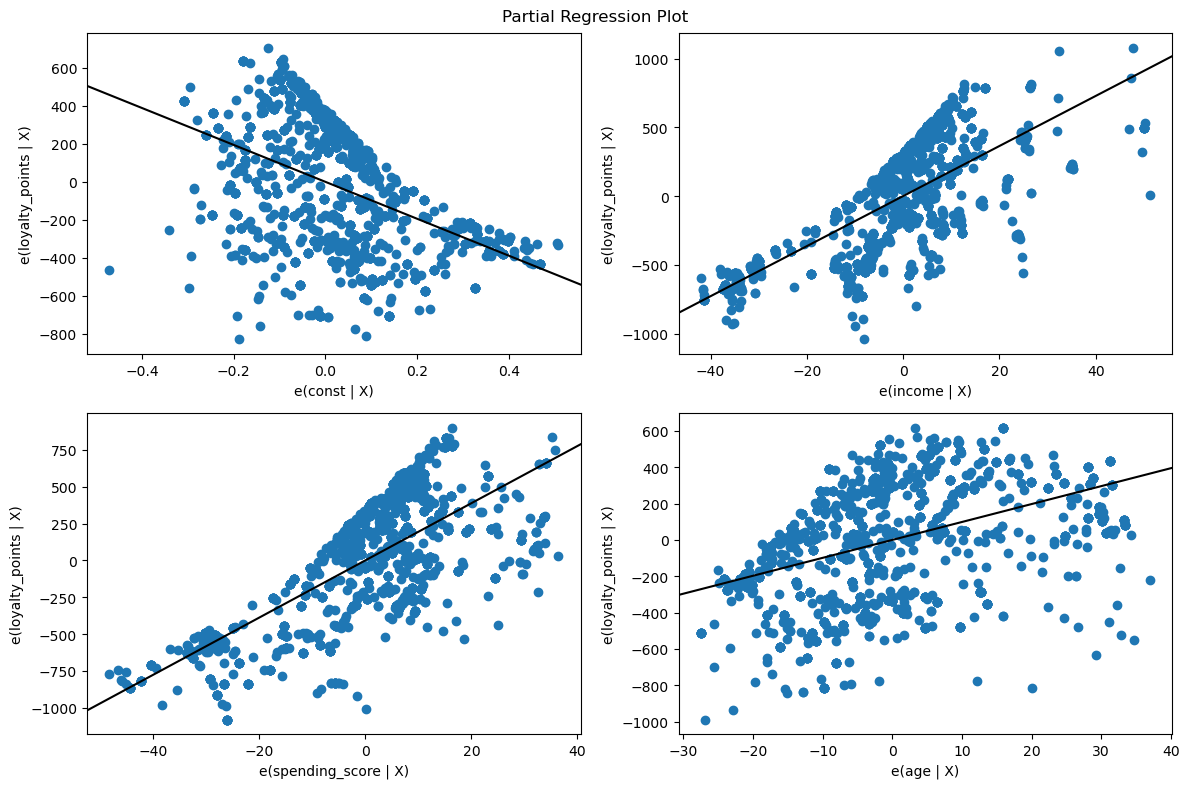

In [86]:
# Evaluating the effectiveness of the data's resuduals and Q-Q plot 
# Define the independent variables and the dependent variable
X = lower_loyalty_points_data[['income', 'spending_score', 'age']]
y = lower_loyalty_points_data['loyalty_points']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Residuals vs Fitted Plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

# Q-Q Plot to check for normality of residuals
qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# Partial Regression Plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()

The funnel shape of the residuals suggests some degree of heteroscedasticity in the lower loyalty points data, the 

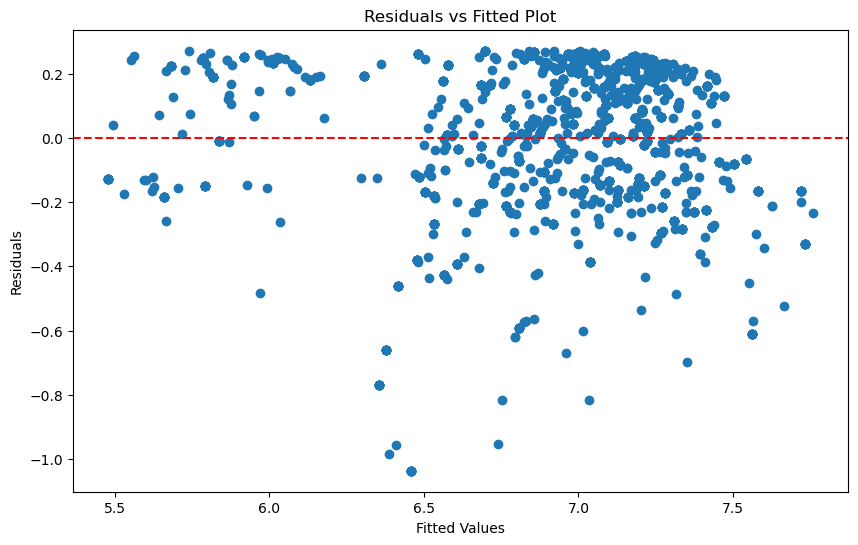

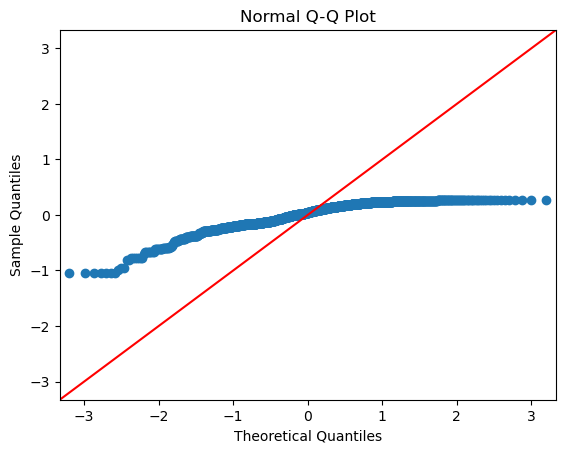

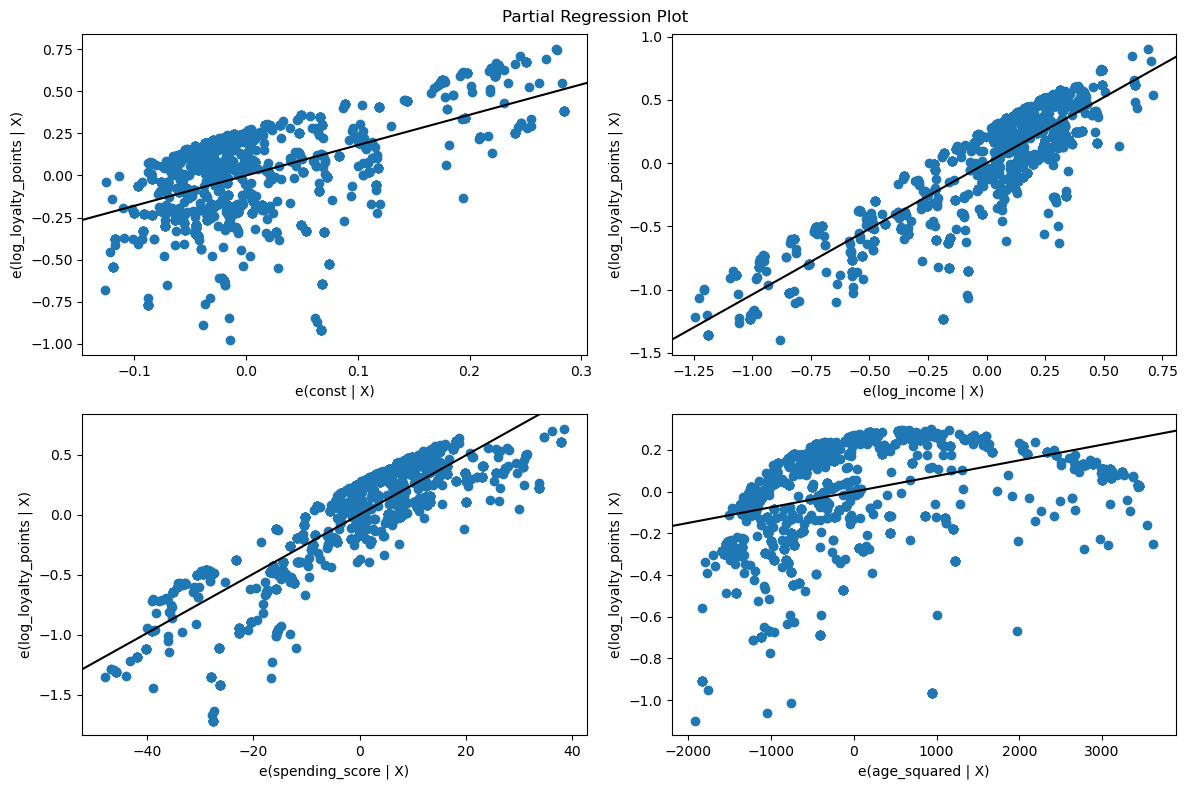

In [88]:
# Further trying to normalise the lower_loyalty group and evaluate its effectiveness with residuals and Q-Q plot
# Add age squared
lower_loyalty_points_data['age_squared'] = lower_loyalty_points_data['age'] ** 2

# 1. Log Transformation for 'income' and 'loyalty_points'
lower_loyalty_points_data['log_income'] = np.log(lower_loyalty_points_data['income'] + 1)  # Adding 1 to avoid log(0)
lower_loyalty_points_data['log_loyalty_points'] = np.log(lower_loyalty_points_data['loyalty_points'] + 1)

# Define the independent variables and the dependent variable
X = lower_loyalty_points_data[['log_income', 'spending_score', 'age_squared']]
y = lower_loyalty_points_data['log_loyalty_points']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Residuals vs Fitted Plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

# Q-Q Plot to check for normality of residuals
qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# Partial Regression Plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()

Logartithmic transformation helped with the partial regressions plots for income, however the Q-Q plot still shows that the model is not very well fitting for the lower loyalty bounds

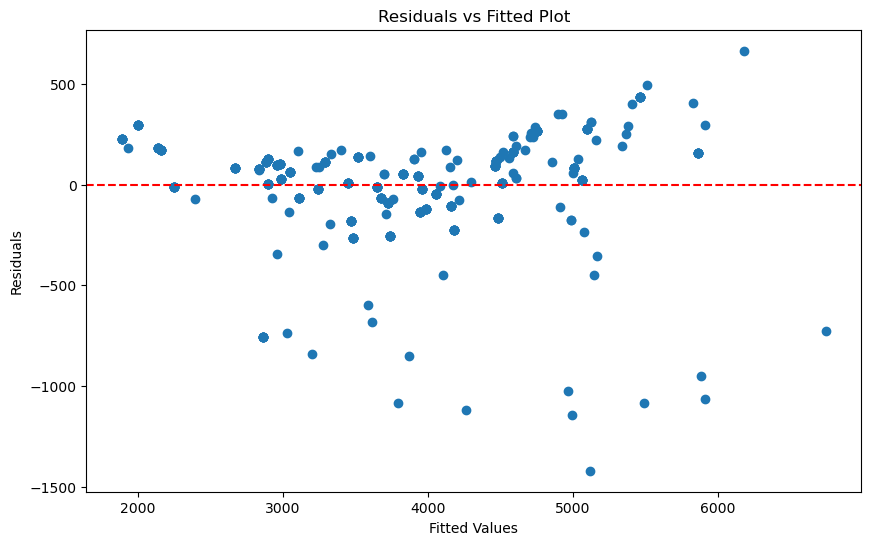

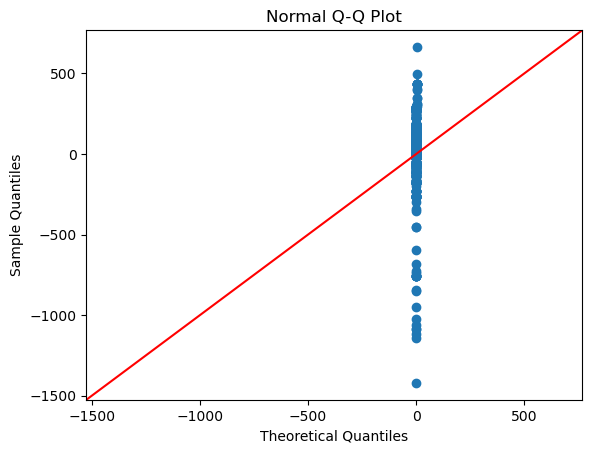

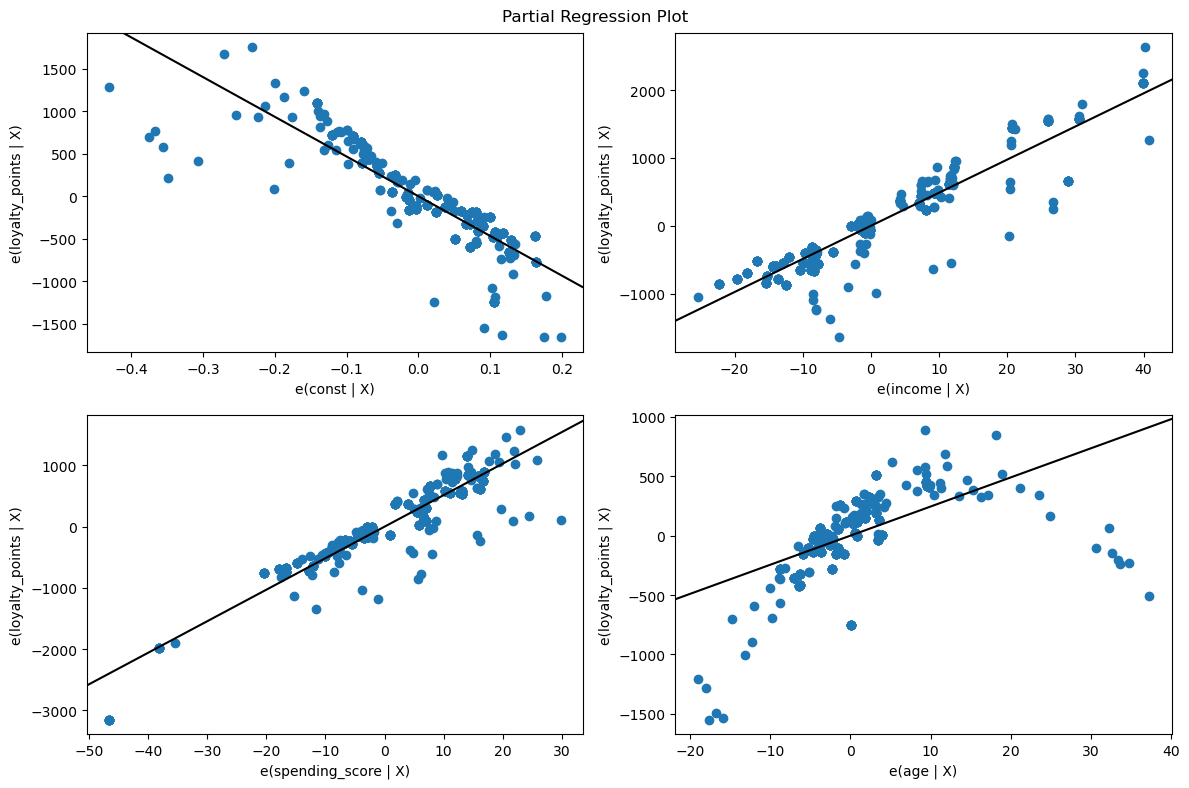

In [90]:
# Define the independent variables and the dependent variable
X = upper_loyalty_points_data[['income', 'spending_score', 'age']]
y = upper_loyalty_points_data['loyalty_points']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Residuals vs Fitted Plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

# Q-Q Plot to check for normality of residuals
qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# Partial Regression Plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()

It appears that for the upper loyalty point band the OLS model has an improved residual and Q-Q-plot as well as better partial regression plots apart from age. 

Based on this we will focus a multiple regression plot for the upper loyalty points without the age included.

### Multi-linear regression plot for upper-loyalty points (above 2000)

In [94]:
# Define the dependent variable.
y = upper_loyalty_points_data['loyalty_points']

# Define the independent variable.
X = upper_loyalty_points_data[['spending_score', 'income']] 

In [95]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [96]:
# Call the predictions for X (array).
multi.predict(X)

array([1655.85311302, 1920.62866751, 1903.79872278, 2031.97901384,
       3627.09160758, 2990.29894677, 3900.28213443, 2933.54722914,
       2933.54722914, 2780.12202097, 3641.76846337, 2916.7172844 ,
       2908.30231203, 3963.29573549, 3713.1970368 , 4236.48626235,
       3124.74112126, 3938.05081839, 3841.37732786, 3261.33638468,
       3889.71407313, 3358.00987521, 3116.32614889, 3639.61537444,
       4202.82637288, 3492.4520497 , 4499.1087279 , 2992.25465232,
       3572.2955955 , 4394.020265  , 4143.92156631, 3322.19689681,
       4536.87741186, 4503.21752239, 4639.81278582, 2311.23404074,
       5114.7652661 , 3792.84319921, 4694.41141451, 3921.02349027,
       5383.64961508, 5083.06108218, 2857.41771106, 5080.90799325,
       5955.07820251, 1655.85311302, 1920.62866751, 1903.79872278,
       2031.97901384, 3627.09160758, 2990.29894677, 3900.28213443,
       2933.54722914, 2933.54722914, 2780.12202097, 3641.76846337,
       2916.7172844 , 2908.30231203, 3963.29573549, 3713.19703

In [97]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8984750546486638
Intercept:  -3526.1545414678417
Coefficients:


[('spending_score', 48.33674526483487), ('income', 48.68508889969701)]

In [98]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [99]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1195.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.11e-137
Time:                        10:23:52   Log-Likelihood:                -2012.7
No. Observations:                 280   AIC:                             4031.
Df Residuals:                     277   BIC:                             4042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3617.5891    153.158    -23.

In [100]:
# print the R-squared value for the training set
print(multi.score(x_train, y_train)*100)

89.5951453018076


In [101]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [102]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [3102.20969845 3249.44038922 3936.51694614 4539.82181254 4204.40861019
 5393.30519801 3781.89267566 4396.65365983 4539.82181254 3887.44004922
 5085.92470592 3637.26153016 4504.39552256 2824.32490942 4396.65365983
 3708.84560652 3623.61092322 5393.30519801 4696.6405722  3781.89267566
 5124.68203757 3623.61092322 3347.59418306 3887.44004922 3111.06627095
 3708.84560652 3708.84560652 3347.59418306 4142.41260272 3308.10535503
 3900.35915976 4142.41260272 2976.75469072 4239.83490017 3637.26153016
 2892.25150382 3963.08666363 5124.68203757 3911.41022144 3911.41022144
 4142.41260272 3562.34641214 3111.06627095 4504.39552256 3911.41022144
 5965.97780888 4539.82181254 3562.34641214 2892.25150382 2004.07332476
 1874.55577899 4204.40861019 4504.39552256 3900.35915976 2918.82122131
 3633.19899211 2918.82122131 3963.08666363 3633.19899211 3633.19899211
 3781.89267566 2762.73395804 4539.82181254 1874.55577899 3102.20969845
 3838.36315229 3347.59418306 3911.41022144 5393.3051

In [103]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_test, sm.add_constant(x_test)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     554.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           2.13e-60
Time:                        10:23:52   Log-Likelihood:                -863.54
No. Observations:                 120   AIC:                             1733.
Df Residuals:                     117   BIC:                             1741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3345.2396    217.852    -15.

In [104]:
# Print the R-squared value for the test data set.
print(mlr.score(x_test, y_test)*100)  

90.28373287527072


In [105]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        63.3           const
1         1.0  spending_score
2         1.0          income


VIF = 1.0 for both: A VIF value close to 1 indicates that there is very little multicollinearity between the spending_score and income variables. Generally:
VIF < 5: Indicates low multicollinearity and is usually acceptable.

In [107]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [108]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 3.9088111462409048, 'LM Test p-value': 0.14164865143965724, 'F-stat': 1.9697054902516749, 'F-test p-value': 0.14409660202832825}


These values suggest that there is not significant heteroscedasticity in the model.

In [110]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 235.1508632507502
Mean Square Error (Final): 104233.0454461072


The MAE is more useful in this scenario as it is in the same unit as the loyalty points. The average error in the models' prediction is approximately 235 loyalty points.

The multi-linear regression model for loyalty-points above 2000 indicated that income and spending scores represent around 90% of the change in loyalty points. increase in one point in spending and 1000K increase in income results in around 50 points increase in loyalty point in this higher band of loyalty point data.

### Plotting the multi-linear regression model on the whole dataset with log values.

As a comparison we fitted the whole dataset into the multi-linear regression, however it is important to note that there is a level of heteroscedasticity and poor capture of the model. Again we excluded age as this did not provide significant impact. Log values were used in this instance, it hasn't completely improved the distribution, but shown better residuals.

In [115]:
reviews = pd.read_csv('turtle_reviews_no_outliers.csv')

# Define the dependent variable.
#y = reviews['loyalty_points'] 

# Define the independent variable.
#X = reviews[['spending_score', 'income']] 

# Add age squared
#reviews['age_squared'] = reviews['age'] ** 2

# 1. Log Transformation for 'income' and 'loyalty_points'
reviews['log_income'] = np.log(reviews['income'] + 1)  # Adding 1 to avoid log(0)
reviews['log_loyalty_points'] = np.log(reviews['loyalty_points'] + 1)

# Define the independent variables and the dependent variable
X = reviews[['log_income', 'spending_score']]
y = reviews['log_loyalty_points']

In [116]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [117]:
# Call the predictions for X (array).
multi.predict(X)

array([5.2529113 , 6.57562656, 4.28728632, ..., 6.67951037, 7.00467992,
       6.67951037])

In [118]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8214108822731969
Intercept:  0.8390172740704536
Coefficients:


[('log_income', 1.2310467179336726), ('spending_score', 0.031493220518139464)]

In [119]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [120]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2709.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:23:52   Log-Likelihood:                -614.22
No. Observations:                1213   AIC:                             1234.
Df Residuals:                    1210   BIC:                             1250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8396      0.094      8.

In [121]:
# print the R-squared value for the training set
print(multi.score(x_train, y_train)*100)

81.72301154356488


In [122]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [123]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [8.26996852 5.05045544 7.21189135 ... 5.24765025 6.82735929 6.96972993]


In [124]:

# Print the R-squared value for the test data set.
print(mlr.score(x_test, y_test)*100) 

83.08488858445249


In [125]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        66.7           const
1         1.1      log_income
2         1.1  spending_score


In [126]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [127]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 71.09125625502071, 'LM Test p-value': 3.653674452013488e-16, 'F-stat': 37.66519020883594, 'F-test p-value': 1.3527312366448877e-16}


In [128]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.28057113517490206
Mean Square Error (Final): 0.13290903822378186


The values suggest lower performance of the model, the R-squared indicates that the model captures around 82% impact on the loyalty points. The low VIF scores indicates no colliniearity between income and spending_scores. The large LM stat suggests that there is some evidence of model misspecification, such as omitted variables or heteroscedasticity. The model indicates that 1% increase in income is associated with a 1.2248% increase in loyalty points, holding all other factors constant. Each additional unit increase in spending score, loyalty points increase by approximately 3.18%.

### Fitting Quantile regression.

In [131]:
# Exploring the entire dataset including outliers with quantile regression 
reviews = pd.read_csv('turtle_reviews_cleaned.csv') 

X = reviews[['income', 'age', 'spending_score']]
y = reviews['loyalty_points']
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Add a constant to the model (for the intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Step 4: Fit the Quantile Regression model for the 50th percentile (median)
quantile = 0.5
model = sm.QuantReg(y_train, X_train_sm)
res = model.fit(q=quantile)

# Step 5: Print the summary of the model
print(res.summary())

# Step 6: Predict on the test set
y_pred = res.predict(X_test_sm)

# Step 7: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Quantile {quantile}: {mae}")

                         QuantReg Regression Results                          
Dep. Variable:         loyalty_points   Pseudo R-squared:               0.5593
Model:                       QuantReg   Bandwidth:                       174.0
Method:                 Least Squares   Sparsity:                        833.7
Date:                Wed, 28 Aug 2024   No. Observations:                 1400
Time:                        10:23:53   Df Residuals:                     1396
                                        Df Model:                            3
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2491.4074     50.471    -49.363      0.000   -2590.414   -2392.401
income            34.4618      0.484     71.223      0.000      33.513      35.411
age               12.3972      0.840     14.756      0.000      10.749      14.045
spending_score    38.9439      0

Quantile 0.25 regression results:
                         QuantReg Regression Results                          
Dep. Variable:         loyalty_points   Pseudo R-squared:               0.4890
Model:                       QuantReg   Bandwidth:                       196.1
Method:                 Least Squares   Sparsity:                        1420.
Date:                Wed, 28 Aug 2024   No. Observations:                 1400
Time:                        10:23:53   Df Residuals:                     1396
                                        Df Model:                            3
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2456.2067     73.406    -33.461      0.000   -2600.204   -2312.210
income            33.8644      0.854     39.663      0.000      32.190      35.539
age               10.4888      1.445      7.261      0.000       7.655      13.32

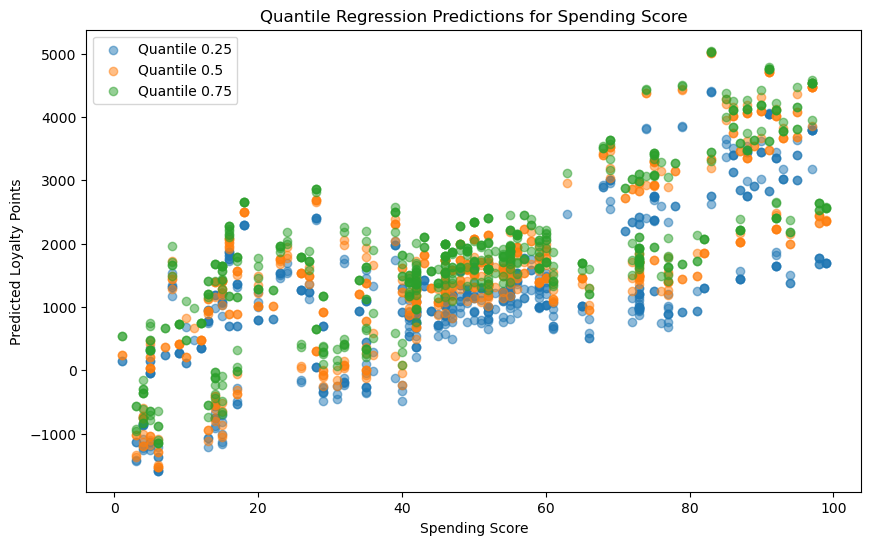

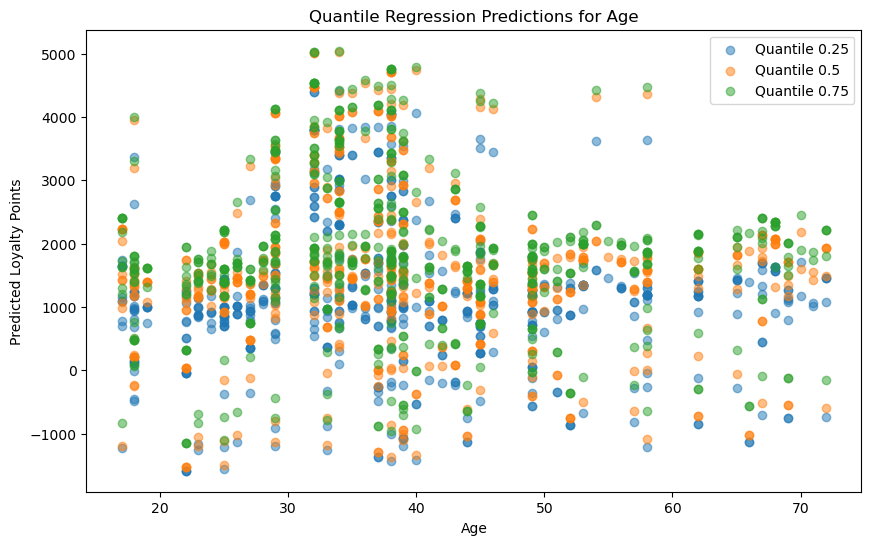

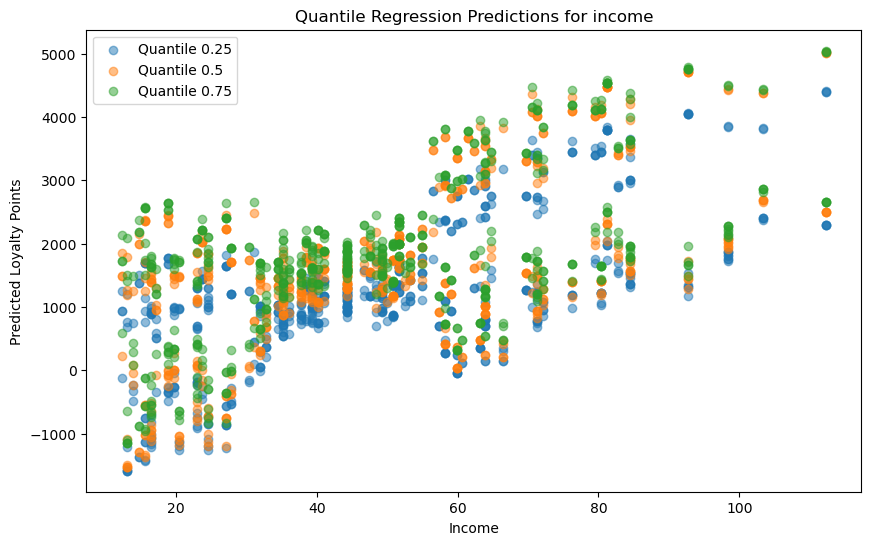

In [132]:
# Define the quantiles you want to estimate
quantiles = [0.25, 0.5, 0.75]
predictions = {}

# Fit the models for each quantile and store the predictions
for quantile in quantiles:
    model = sm.QuantReg(y_train, X_train_sm)
    res = model.fit(q=quantile)
    predictions[quantile] = res.predict(X_test_sm)
    print(f"Quantile {quantile} regression results:")
    print(res.summary())

# Plot the predictions for different quantiles
plt.figure(figsize=(10, 6))
for quantile in quantiles:
    plt.scatter(X_test['spending_score'], predictions[quantile], label=f'Quantile {quantile}', alpha=0.5)

plt.xlabel('Spending Score')
plt.ylabel('Predicted Loyalty Points')
plt.title('Quantile Regression Predictions for Spending Score')
plt.legend()
plt.show()

# Plot the predictions for different quantiles
plt.figure(figsize=(10, 6))
for quantile in quantiles:
    plt.scatter(X_test['age'], predictions[quantile], label=f'Quantile {quantile}', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Predicted Loyalty Points')
plt.title('Quantile Regression Predictions for Age')
plt.legend()
plt.show()

# Plot the predictions for different quantiles
plt.figure(figsize=(10, 6))
for quantile in quantiles:
    plt.scatter(X_test['income'], predictions[quantile], label=f'Quantile {quantile}', alpha=0.5)

plt.xlabel('Income')
plt.ylabel('Predicted Loyalty Points')
plt.title('Quantile Regression Predictions for income')
plt.legend()
plt.show()

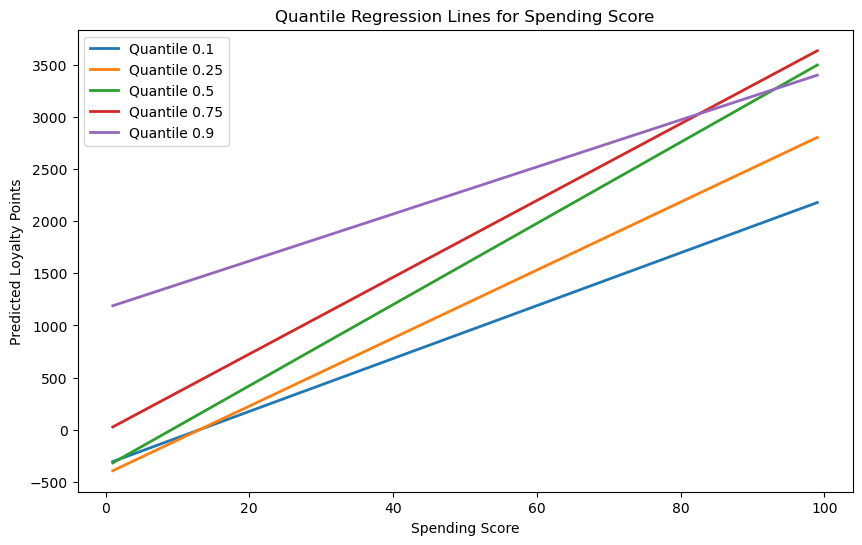

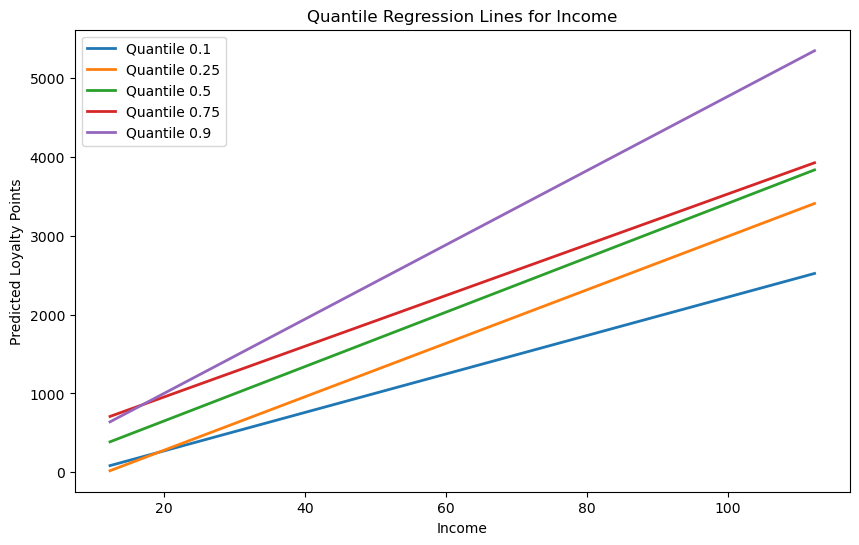

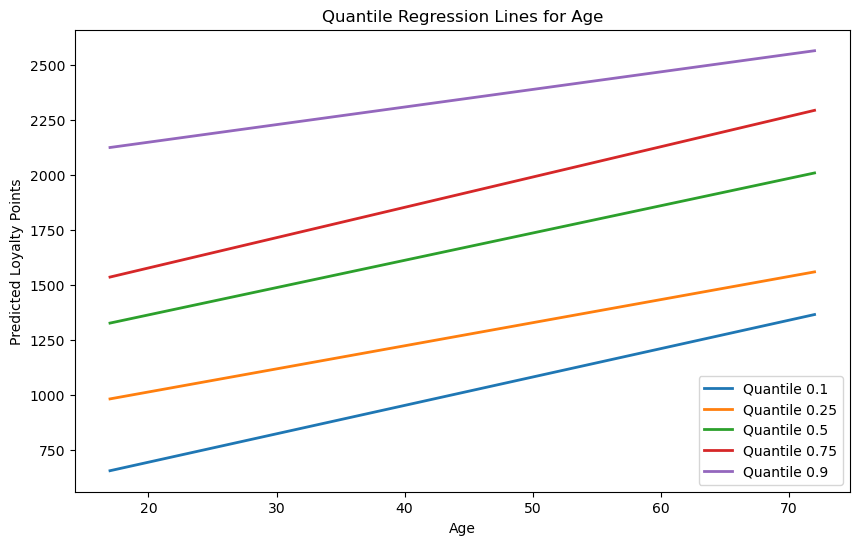

In [133]:
# Plotting the Quantile regression charts as lines. 
# Define the quantiles to plot
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Prepare arrays to store the predicted loyalty points for each quantile for each variable
predictions_spending_score = {}
predictions_income = {}
predictions_age = {}

# Define ranges of values for each variable
spending_scores = np.linspace(X_train['spending_score'].min(), X_train['spending_score'].max(), 100)
income_values = np.linspace(X_train['income'].min(), X_train['income'].max(), 100)
age_values = np.linspace(X_train['age'].min(), X_train['age'].max(), 100)

# Loop over each quantile and calculate predictions for spending score, income, and age
for quantile in quantiles:
    # Fit the quantile regression model for the current quantile
    model = sm.QuantReg(y_train, X_train_sm)
    res = model.fit(q=quantile)
    
    # Predict loyalty points across the range of spending scores (fix income and age at their mean)
    X_pred_spending_score = np.column_stack([
        np.ones_like(spending_scores),
        np.full_like(spending_scores, X_train['income'].mean()),  # Fix income at its mean
        np.full_like(spending_scores, X_train['age'].mean()),     # Fix age at its mean
        spending_scores                                           # Vary spending score
    ])
    predictions_spending_score[quantile] = res.predict(X_pred_spending_score)
    
    # Predict loyalty points across the range of income values (fix spending score and age at their mean)
    X_pred_income = np.column_stack([
        np.ones_like(income_values),
        income_values,                                            # Vary income
        np.full_like(income_values, X_train['age'].mean()),       # Fix age at its mean
        np.full_like(income_values, X_train['spending_score'].mean())  # Fix spending score at its mean
    ])
    predictions_income[quantile] = res.predict(X_pred_income)
    
    # Predict loyalty points across the range of age values (fix income and spending score at their mean)
    X_pred_age = np.column_stack([
        np.ones_like(age_values),
        np.full_like(age_values, X_train['income'].mean()),       # Fix income at its mean
        age_values,                                               # Vary age
        np.full_like(age_values, X_train['spending_score'].mean())  # Fix spending score at its mean
    ])
    predictions_age[quantile] = res.predict(X_pred_age)

# Plot the results for spending score
plt.figure(figsize=(10, 6))
for quantile in quantiles:
    plt.plot(spending_scores, predictions_spending_score[quantile], label=f'Quantile {quantile}', linewidth=2)
plt.xlabel('Spending Score')
plt.ylabel('Predicted Loyalty Points')
plt.title('Quantile Regression Lines for Spending Score')
plt.legend()
plt.show()

# Plot the results for income
plt.figure(figsize=(10, 6))
for quantile in quantiles:
    plt.plot(income_values, predictions_income[quantile], label=f'Quantile {quantile}', linewidth=2)
plt.xlabel('Income')
plt.ylabel('Predicted Loyalty Points')
plt.title('Quantile Regression Lines for Income')
plt.legend()
plt.show()

# Plot the results for age
plt.figure(figsize=(10, 6))
for quantile in quantiles:
    plt.plot(age_values, predictions_age[quantile], label=f'Quantile {quantile}', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Predicted Loyalty Points')
plt.title('Quantile Regression Lines for Age')
plt.legend()
plt.show()


Results: The Quantile regression whilst it has lower R-squared values than the MLR model, it is less sensitive to the underlying data, which was not normally distributed. The Quantile regression model also shows increasing trends of loyalty points with increase in income and spending_score and age as well.

### Overall recommendations:

Due to non-normal distribution of the underlying data linear regression models may not be the most appropriate models to accurately predict loyalty points. Log transformations did not improve the distribution of the underlying data. 
Quantile regression was also used which is not as sensitive to the distribution of the underlying data. The Quantile regression had better accuracy for higher quantiles. 

Overall all linear models indicate a strong relationship of spending score and income and loyalty points. Especially higher spending scores lead to increased loyalty points and also higher incomes lead to higher loyalty points. Generally older customers indicate higher loyalty points as well. Therefore marketing strategies should focus on these insights.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


### Load and prepare the data

In [136]:
# Create your new DataFrame.
reviews2 = pd.read_csv('turtle_reviews_cleaned.csv')
reviews2

gender  age  income  spending_score  loyalty_points education  product  \
0       Male   18   12.30              39             210  graduate      453   
1       Male   23   12.30              81             524  graduate      466   
2     Female   22   13.12               6              40  graduate      254   
3     Female   25   13.12              77             562  graduate      263   
4     Female   33   13.94              40             366  graduate      291   
...      ...  ...     ...             ...             ...       ...      ...   
1995  Female   37   84.46              69            4031       PhD      977   
1996  Female   43   92.66               8             539       PhD      979   
1997    Male   34   92.66              91            5614  graduate     1012   
1998    Male   34   98.40              16            1048       PhD     1031   
1999    Male   32   92.66               8             479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [137]:
reviews2['education'].value_counts()

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [138]:
# Example: Combine 'Basic' and 'Diploma' into one category
reviews2['education'] = reviews2['education'].replace({'Basic': 'low', 'diploma': 'low'})

In [139]:
# Using ordinal encoding for education 
# to show the higher importance of higher level of education
# Define the order of the education levels
education_order = ['low', 'graduate', 'postgraduate', 'PhD']

# Create an instance of OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Reshape the education column to 2D (required by OrdinalEncoder)
reviews2['education_encoded'] = ordinal_encoder.fit_transform(reviews2[['education']])

# Check the encoded values
print(reviews2[['education', 'education_encoded']].head())

  education  education_encoded
0  graduate                1.0
1  graduate                1.0
2  graduate                1.0
3  graduate                1.0
4  graduate                1.0


In [140]:
reviews2['gender'].value_counts()

gender
Female    1120
Male       880
Name: count, dtype: int64

In [141]:
# Set the variables
X = reviews2.drop(columns=['loyalty_points', 'review', 'education', 'summary'], axis = 1)

y = reviews2['loyalty_points']

In [142]:
# Review X and Y.
X.head()

gender  age  income  spending_score  product  education_encoded
0    Male   18   12.30              39      453                1.0
1    Male   23   12.30              81      466                1.0
2  Female   22   13.12               6      254                1.0
3  Female   25   13.12              77      263                1.0
4  Female   33   13.94              40      291                1.0

In [143]:
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

### Create train and test data sets and adjust categorical variables.

In [145]:
# Define the categorical variables that need to be converted to dummies
cat_vars = ['gender']

# Convert categorical variables to dummy variables with True/False encoding
for var in cat_vars:  
    # Create dummy variables for each categorical variable
    cat_list = pd.get_dummies(X[var], prefix=var, drop_first=False)  # Create dummy variables
    # Convert True/False to 1/0
    cat_list = cat_list.astype(int)  # Convert True/False to 1/0
    # Join the new dummy variables to the original DataFrame
    X = X.join(cat_list)

# Drop the original categorical columns
df_fin = X.drop(cat_vars, axis=1)

# Check the columns in the final DataFrame
print(df_fin.columns.values)

# View the resulting DataFrame
print(df_fin.head())


['age' 'income' 'spending_score' 'product' 'education_encoded'
 'gender_Female' 'gender_Male']
   age  income  spending_score  product  education_encoded  gender_Female  \
0   18   12.30              39      453                1.0              0   
1   23   12.30              81      466                1.0              0   
2   22   13.12               6      254                1.0              1   
3   25   13.12              77      263                1.0              1   
4   33   13.94              40      291                1.0              1   

   gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


In [146]:
# drop the gender_Male column to avoid duplication of the gender data
df_fin.drop('gender_Male', axis=1, inplace= True)
X= df_fin
X.head()

age  income  spending_score  product  education_encoded  gender_Female
0   18   12.30              39      453                1.0              0
1   23   12.30              81      466                1.0              0
2   22   13.12               6      254                1.0              1
3   25   13.12              77      263                1.0              1
4   33   13.94              40      291                1.0              1

In [147]:
# Split the data into training and test sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit the Decision tree

In [149]:
# Unpruned model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predictions for unpruned model
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Unpruned model performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Unpruned Model - Train MSE: {train_mse}, Train RMSE: {train_rmse}, Train R^2: {train_r2}, Train MAE: {train_mae}")
print(f"Unpruned Model - Test MSE: {test_mse}, Test RMSE: {test_rmse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

# Pruned model (with max_depth)
pruned_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
pruned_regressor.fit(X_train, y_train)

# Predictions for pruned model
y_train_pruned_pred = pruned_regressor.predict(X_train)
y_test_pruned_pred = pruned_regressor.predict(X_test)

# Pruned model performance metrics
pruned_train_mse = mean_squared_error(y_train, y_train_pruned_pred)
pruned_test_mse = mean_squared_error(y_test, y_test_pruned_pred)
pruned_train_rmse = np.sqrt(pruned_train_mse)
pruned_test_rmse = np.sqrt(pruned_test_mse)
pruned_train_r2 = r2_score(y_train, y_train_pruned_pred)
pruned_test_r2 = r2_score(y_test, y_test_pruned_pred)
pruned_train_mae = mean_absolute_error(y_train, y_train_pruned_pred)
pruned_test_mae = mean_absolute_error(y_test, y_test_pruned_pred)

print(f"Pruned Model - Train MSE: {pruned_train_mse}, Train RMSE: {pruned_train_rmse}, Train R^2: {pruned_train_r2}, Train MAE: {pruned_train_mae}")
print(f"Pruned Model - Test MSE: {pruned_test_mse}, Test RMSE: {pruned_test_rmse}, Test R^2: {pruned_test_r2}, Test MAE: {pruned_test_mae}")


Unpruned Model - Train MSE: 0.0, Train RMSE: 0.0, Train R^2: 1.0, Train MAE: 0.0
Unpruned Model - Test MSE: 9723.271666666667, Test RMSE: 98.60665122934998, Test R^2: 0.9939972280583127, Test MAE: 37.20166666666667
Pruned Model - Train MSE: 148463.69952137195, Train RMSE: 385.3098746741017, Train R^2: 0.9103965014695461, Train MAE: 277.9036600428747
Pruned Model - Test MSE: 137962.67325147352, Test RMSE: 371.4332689077185, Test R^2: 0.9148271803581075, Test MAE: 267.1299251233641


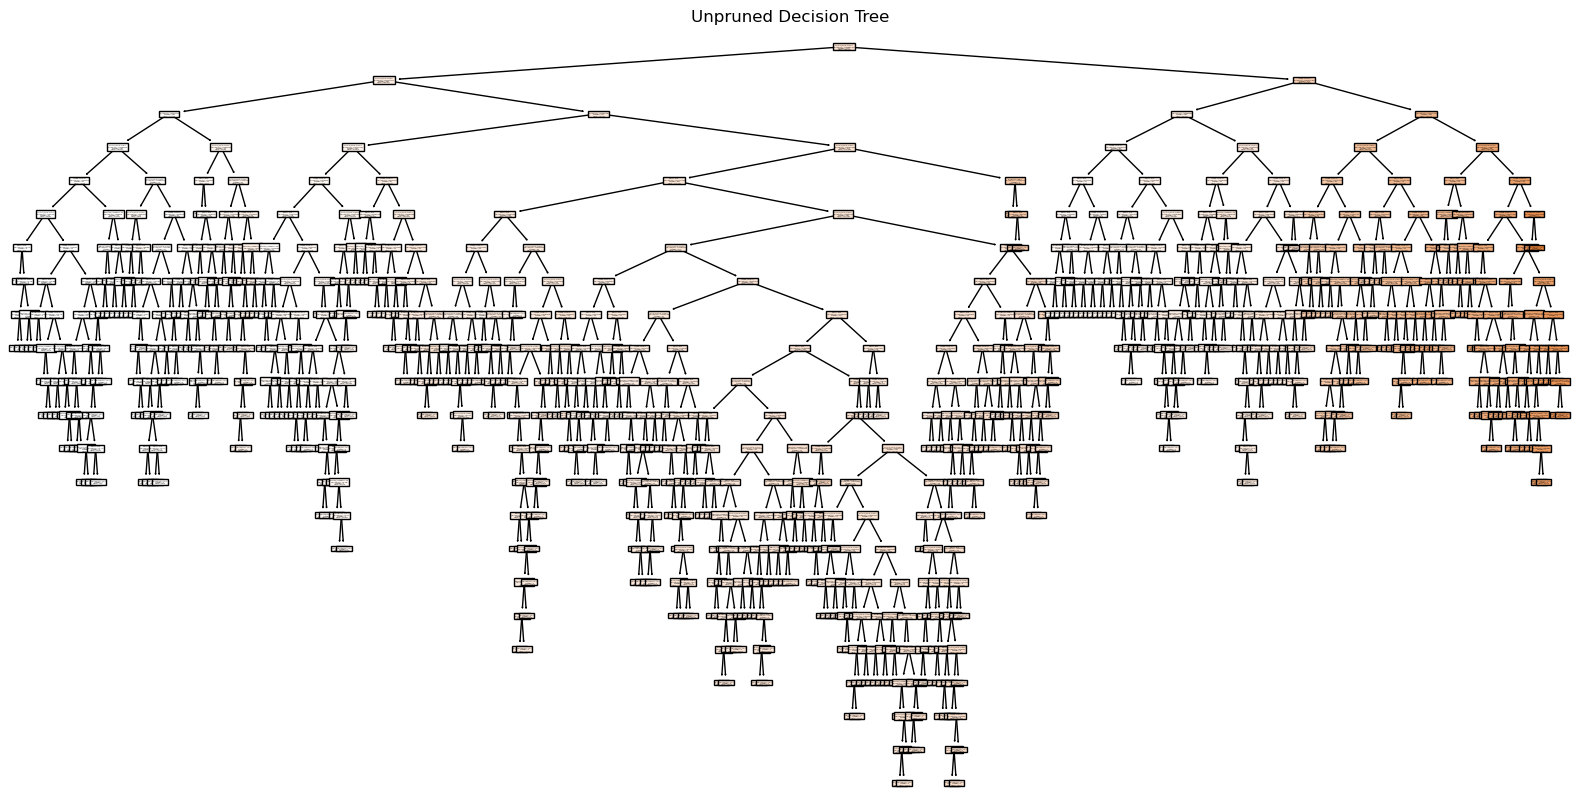

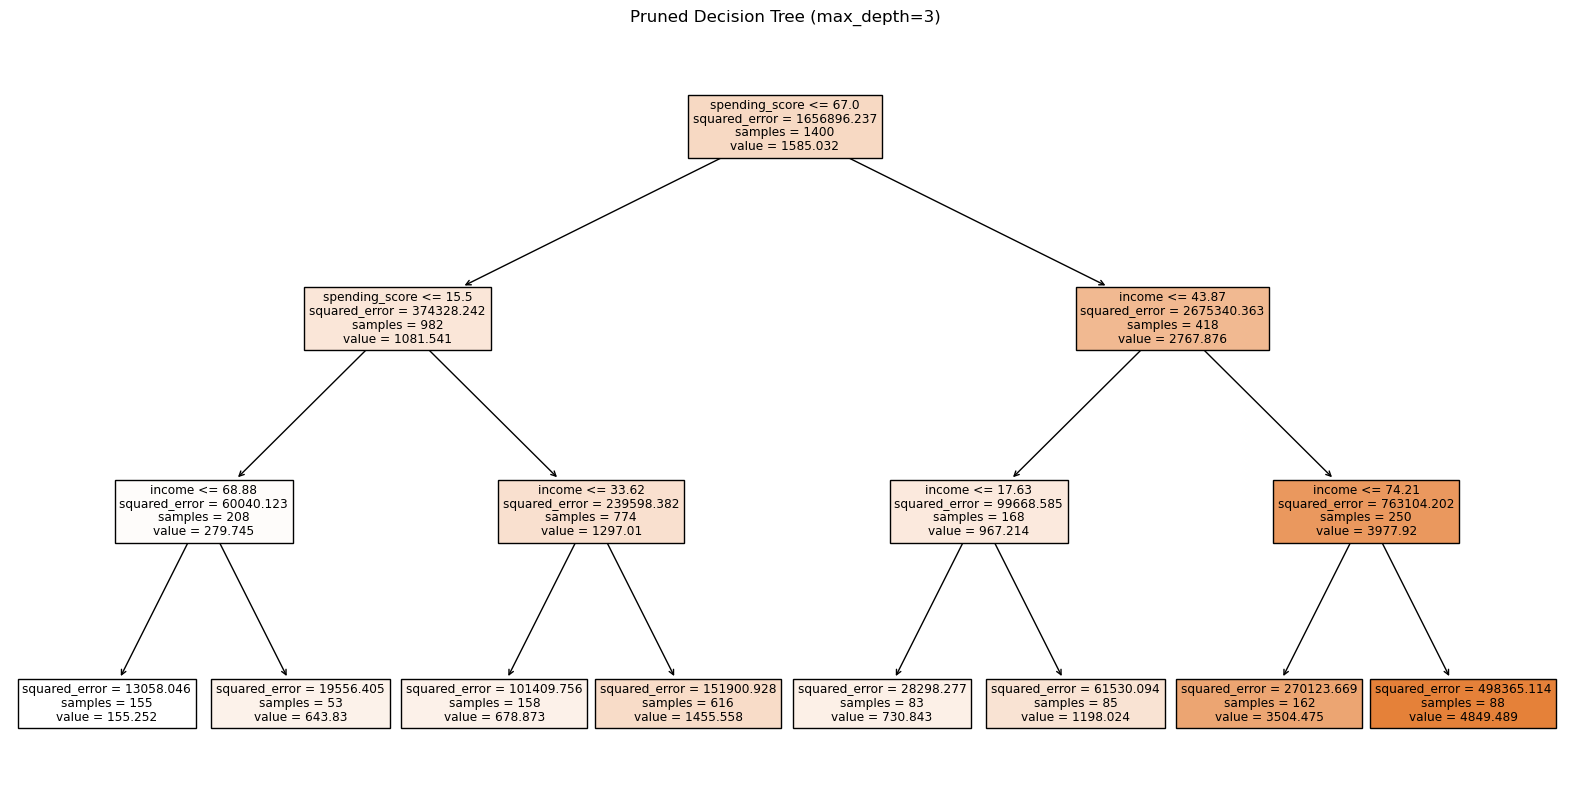

In [150]:

# Visualize the unpruned decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot for better readability
plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.title("Unpruned Decision Tree")
plt.show()

# Visualize the pruned decision tree (with max_depth=3)
plt.figure(figsize=(20, 10))
plot_tree(pruned_regressor, feature_names=X_train.columns, filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()


In [151]:
# Get feature importances
feature_importances = pd.Series(regressor.feature_importances_, index=X_train.columns)

# Sort and display feature importances
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

income               0.498102
spending_score       0.482981
age                  0.017081
education_encoded    0.000997
product              0.000712
gender_Female        0.000127
dtype: float64


In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Unpruned model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predictions for unpruned model
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Unpruned model performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Unpruned Model - Train MSE: {train_mse}, Train R^2: {train_r2}, Train MAE: {train_mae}")
print(f"Unpruned Model - Test MSE: {test_mse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

# Pruned model (with max_depth)
pruned_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
pruned_regressor.fit(X_train, y_train)

# Predictions for pruned model
y_train_pruned_pred = pruned_regressor.predict(X_train)
y_test_pruned_pred = pruned_regressor.predict(X_test)

# Pruned model performance metrics
pruned_train_mse = mean_squared_error(y_train, y_train_pruned_pred)
pruned_test_mse = mean_squared_error(y_test, y_test_pruned_pred)
pruned_train_r2 = r2_score(y_train, y_train_pruned_pred)
pruned_test_r2 = r2_score(y_test, y_test_pruned_pred)
pruned_train_mae = mean_absolute_error(y_train, y_train_pruned_pred)
pruned_test_mae = mean_absolute_error(y_test, y_test_pruned_pred)

print(f"Pruned Model - Train MSE: {pruned_train_mse}, Train R^2: {pruned_train_r2}, Train MAE: {pruned_train_mae}")
print(f"Pruned Model - Test MSE: {pruned_test_mse}, Test R^2: {pruned_test_r2}, Test MAE: {pruned_test_mae}")


Unpruned Model - Train MSE: 0.0, Train R^2: 1.0, Train MAE: 0.0
Unpruned Model - Test MSE: 9723.271666666667, Test R^2: 0.9939972280583127, Test MAE: 37.20166666666667
Pruned Model - Train MSE: 64177.36297929432, Train R^2: 0.9612665165428146, Train MAE: 173.81004300878405
Pruned Model - Test MSE: 70121.16425180058, Test R^2: 0.9567099046782617, Test MAE: 176.80646418311764


## 4. Fit and plot final model.

In [154]:
# Fit and plot final model.


## 5. Discuss: Insights and observations

***Your observations here...***

In [156]:
# Interpret model and note observations.


Results: 
- income and spending scores are the two features that contribute most to the model and explain the highest relationship with loyalty points. (The training data was a perfect fit both at 70:30 and 60:40 split)
- High R-squared scores indicated good representation of the data 98% for the not pruned set and 91% for the level 3 pruning. Both sets may be prone to large errors due to relatively high RMSE-MAE errors of 61.5 for the test data and 104.3 for the pruned data.
- The highest represented group are customers who have spending score less than 15.5 and income more than 33.32K their predicted loyalty point is 1455. 
- High Spending and High Income: A customer with a spending_score > 67 and income > 74 is predicted to have very high loyalty points (4849).
- Low Spending and Low Income: A customer with a spending_score ≤ 15.5 and income ≤ 68 is predicted to have relatively low loyalty points (155).

### Fit the data with Random Forest model

In [159]:
# Exploring the data using Random Forest
# Split the data into training and test sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importances from the Random Forest model
rf_feature_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
rf_feature_importances.sort_values(ascending=False, inplace=True)

print(rf_feature_importances)

# Predictions for unpruned model
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Unpruned model performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Unpruned Model - Train MSE: {train_mse}, Train RMSE: {train_rmse}, Train R^2: {train_r2}, Train MAE: {train_mae}")
print(f"Unpruned Model - Test MSE: {test_mse}, Test RMSE: {test_rmse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

n_trees = rf_regressor.n_estimators
print(f"Number of trees in the random forest: {n_trees}")

spending_score       0.499425
income               0.482372
age                  0.015007
product              0.001371
education_encoded    0.001315
gender_Female        0.000511
dtype: float64
Unpruned Model - Train MSE: 1053.931429214286, Train RMSE: 32.46431008375638, Train R^2: 0.9993639122319243, Train MAE: 10.664992857142858
Unpruned Model - Test MSE: 6362.615049666666, Test RMSE: 79.76600184080098, Test R^2: 0.9960719675017585, Test MAE: 30.257466666666673
Number of trees in the random forest: 100


The random forest model has similar feature composition to the decision tree regressor model. The random forest is less prone to large errors compared to the decision tree. 

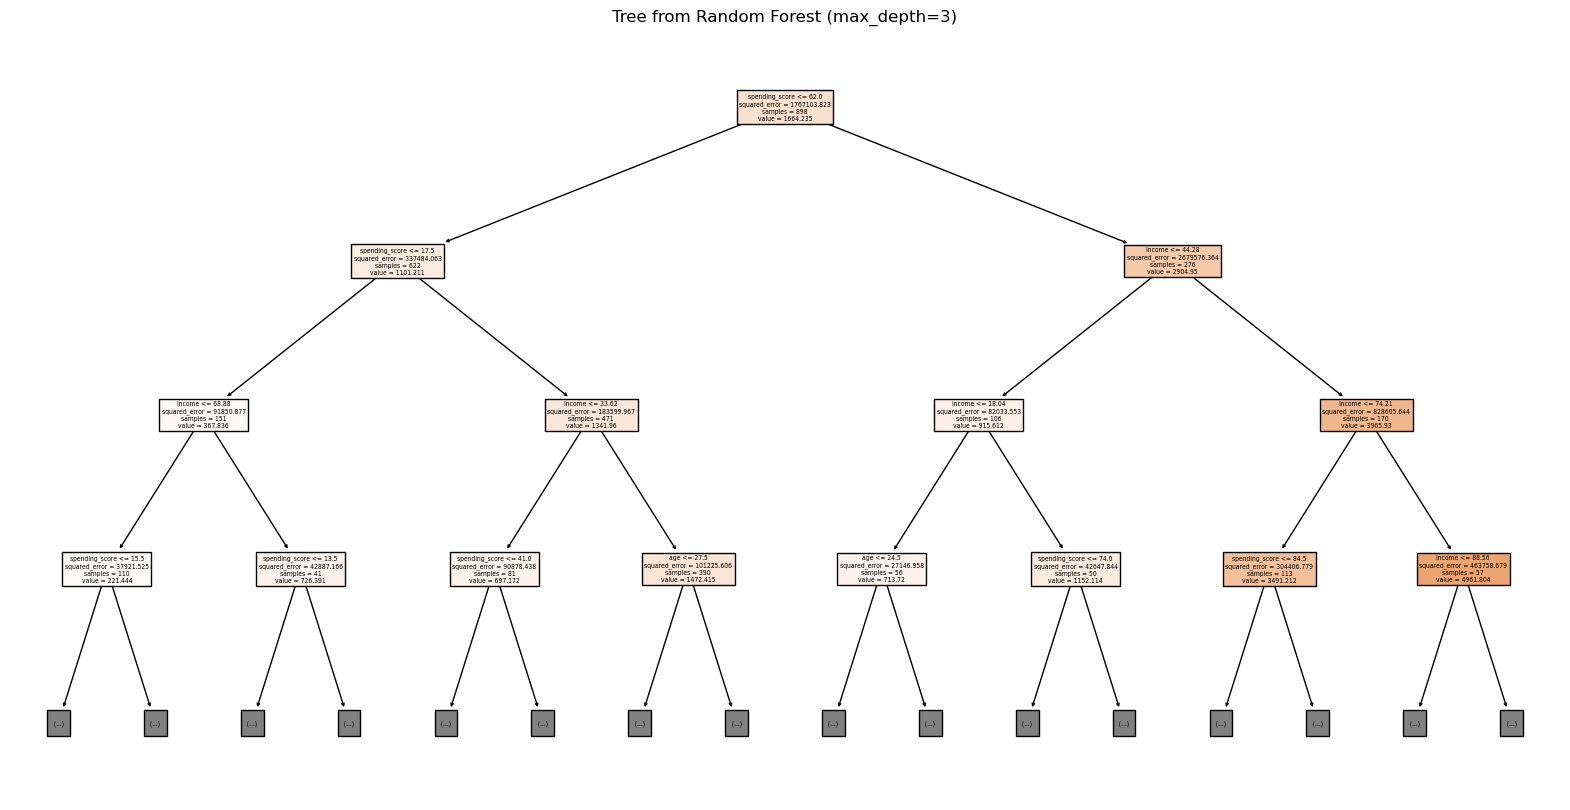

In [161]:
# Extract a single tree from the random forest
# For example, let's visualize the first tree (index 0)
single_tree = rf_regressor.estimators_[0]

# Visualize the extracted tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Tree from Random Forest (max_depth=3)")
plt.show()


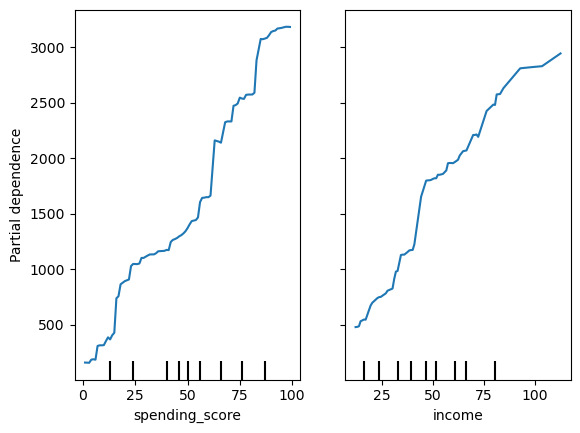

In [162]:
# Create a partial dependence plot for the top features
PartialDependenceDisplay.from_estimator(rf_regressor, X_train, ['spending_score', 'income'])
plt.show()


Both spending score and income show an increasing trend contributing to the loyalty points.

In [164]:
# Showing an average segmentation of the random forest based on spending score and 
# income (using the values from the decision tree regression
# Example segmentation for spending score
high_spenders = X_test[X_test['spending_score'] > 67]
low_spenders = X_test[X_test['spending_score'] <= 67]

# Analyze model predictions for each segment
high_spenders_predictions = rf_regressor.predict(high_spenders)
low_spenders_predictions = rf_regressor.predict(low_spenders)

print(f"Average prediction for high spenders: {high_spenders_predictions.mean()}")
print(f"Average prediction for low spenders: {low_spenders_predictions.mean()}")

# Example segmentation based on income
high_income = X_test[X_test['income'] > 74]  # Adjust the threshold as appropriate for your data
low_income = X_test[X_test['income'] <= 74]  # Adjust the threshold as appropriate for your data

# Analyze model predictions for each income segment
high_income_predictions = rf_regressor.predict(high_income)
low_income_predictions = rf_regressor.predict(low_income)

print(f"Average prediction for high income: {high_income_predictions.mean()}")
print(f"Average prediction for low income: {low_income_predictions.mean()}")

Average prediction for high spenders: 2860.731801242236
Average prediction for low spenders: 1087.7092482915716
Average prediction for high income: 2862.0253260869563
Average prediction for low income: 1328.2989173228348


Results: On average customers with spending score higher than 67 have loyalty points of 2860, lower spenders on average 1087. Similar results for incomes above 74K have average loyalty points of 2862 and lower incomes loyalty points of 1328. 

### Decision-tree for the top features income and spending-score

In [167]:
# Select only the two most important features
X_selected = reviews2[['spending_score', 'income']] 
y = reviews2['loyalty_points']  

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train the Decision Tree Regressor on the selected features
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluate the model
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model with Selected Features - Train MSE: {train_mse}, Train R^2: {train_r2}, Train MAE: {train_mae}")
print(f"Model with Selected Features - Test MSE: {test_mse}, Test R^2: {test_r2}, Test MAE: {test_mae}")

# Pruned model (with max_depth)
pruned_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
pruned_regressor.fit(X_train, y_train)

# Predictions for pruned model
y_train_pruned_pred = pruned_regressor.predict(X_train)
y_test_pruned_pred = pruned_regressor.predict(X_test)

# Pruned model performance metrics
pruned_train_mse = mean_squared_error(y_train, y_train_pruned_pred)
pruned_test_mse = mean_squared_error(y_test, y_test_pruned_pred)
pruned_train_r2 = r2_score(y_train, y_train_pruned_pred)
pruned_test_r2 = r2_score(y_test, y_test_pruned_pred)
pruned_train_mae = mean_absolute_error(y_train, y_train_pruned_pred)
pruned_test_mae = mean_absolute_error(y_test, y_test_pruned_pred)

print(f"Pruned Model - Train MSE: {pruned_train_mse}, Train R^2: {pruned_train_r2}, Train MAE: {pruned_train_mae}")
print(f"Pruned Model - Test MSE: {pruned_test_mse}, Test R^2: {pruned_test_r2}, Test MAE: {pruned_test_mae}")


Model with Selected Features - Train MSE: 18455.976903780742, Train R^2: 0.9888611148401435, Train MAE: 69.1567125533197
Model with Selected Features - Test MSE: 26097.98366433656, Test R^2: 0.9838881140581562, Test MAE: 83.27339035039036
Pruned Model - Train MSE: 148463.69952137195, Train R^2: 0.9103965014695461, Train MAE: 277.9036600428747
Pruned Model - Test MSE: 137962.67325147352, Test R^2: 0.9148271803581075, Test MAE: 267.1299251233641


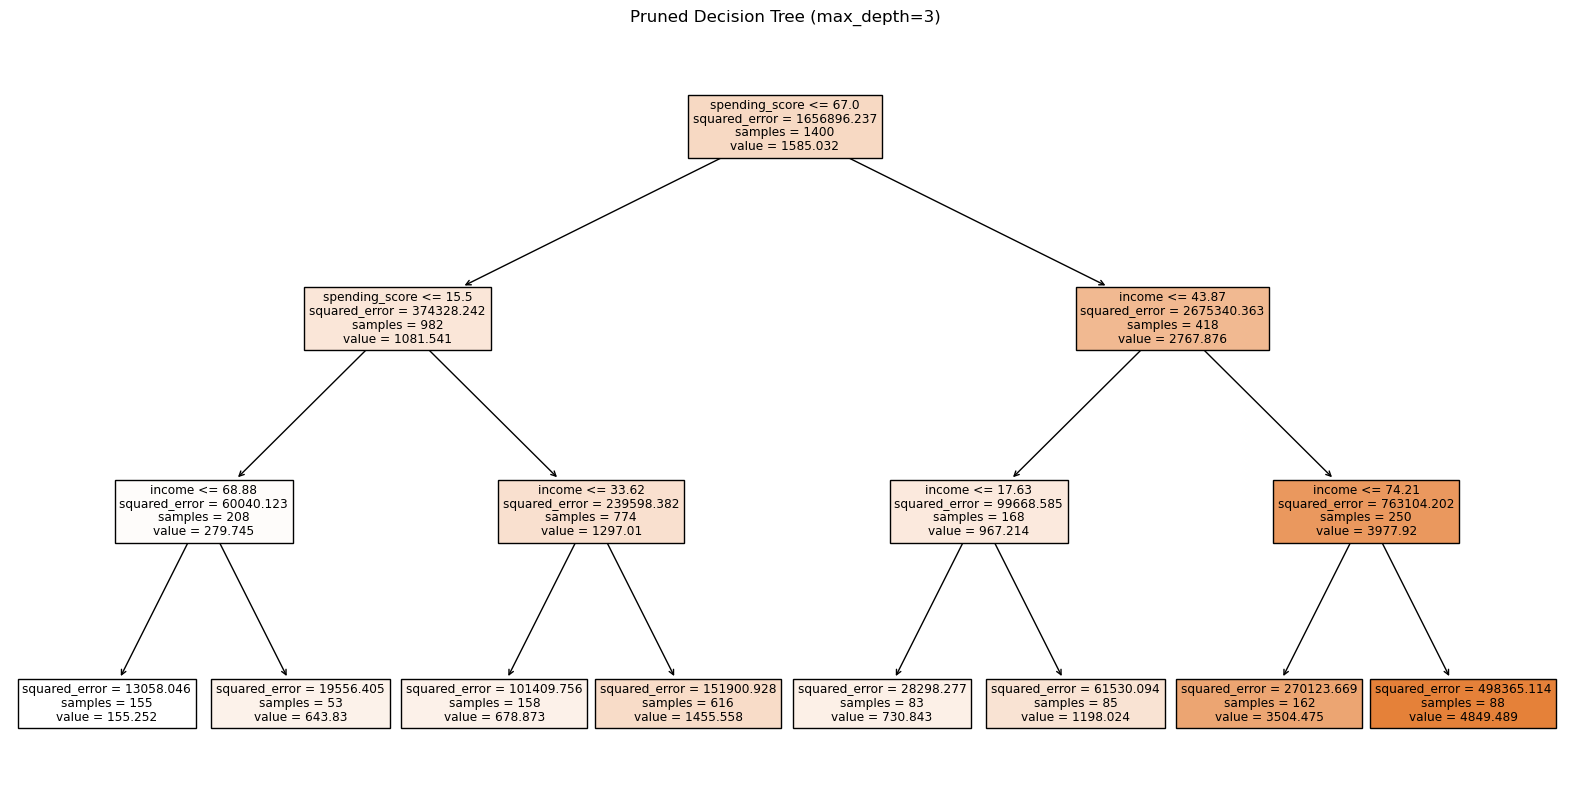

In [168]:
# Visualize the pruned decision tree (with max_depth=3)
plt.figure(figsize=(20, 10))
plot_tree(pruned_regressor, feature_names=X_train.columns, filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

### Recommendations:

- Based on both decision-tree and random forest model's analysis and the feature importance results, it's clear that age, gender, and education were not as significant in predicting loyalty points compared to other features like spending score and income.
- Actionable Features: The most actionable recommendations should focus on spending score and income, as these are the primary drivers in the models.
Supplementary Strategies: Age, gender, and education can still be useful for supplementary strategies, such as personalized marketing, segment-specific campaigns, or testing new approaches to engage different demographics.
- High Spenders: Given that high spenders are predicted to contribute the most, we might focus on retaining and further engaging this group through loyalty programs, exclusive offers, or premium services.
- Low Spenders: For low spenders, consider strategies to increase their engagement. For instance, targeted promotions or personalized offers could encourage them to increase their spending.
- High-Income Customers: Even though high-income customers may not always be high spenders, they still have higher predicted values. We could focus on converting their potential into actual spending through targeted marketing strategies.
- Low-Income Customers: Low-income customers might need incentives such as discounts or budget-friendly options to boost their engagement.
- Supplementary Strategies: Age, gender, and education can still be useful for supplementary strategies, such as personalized marketing, segment-specific campaigns, or testing new approaches to engage different demographics.
- Recommendations Regarding Age, Gender, and Education:
Use for Marketing Personalization: While these features might not directly predict spending or loyalty, they can still be useful for personalizing marketing efforts. For example:
- Age: Older customers might prefer loyalty rewards that focus on long-term value, while younger customers might respond better to instant rewards or discounts.
- Gender: While gender might not predict spending directly, it could help personalize product recommendations or promotions.
- Education: Customers with higher education levels might be more responsive to complex or premium offerings.

### Fitting a linear regression model in predicting high value customers - loyalty points over 2000

In [171]:
X.head()

age  income  spending_score  product  education_encoded  gender_Female
0   18   12.30              39      453                1.0              0
1   23   12.30              81      466                1.0              0
2   22   13.12               6      254                1.0              1
3   25   13.12              77      263                1.0              1
4   33   13.94              40      291                1.0              1

In [172]:
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

In [173]:
# Step 1: Create a binary target variable
# Example: Convert loyalty points into a binary classification (1 for high-value, 0 for low-value)
threshold = 1200
y_binary = (y > threshold).astype(int) 

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg.predict(X_test)

# Step 5: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6966666666666667
Precision: 0.6945244956772334
Recall: 0.7602523659305994
Confusion Matrix:
[[177 106]
 [ 76 241]]


In [174]:
y_binary.value_counts()

loyalty_points
1    1076
0     924
Name: count, dtype: int64

### Logistic regression results - above 2000 loyalty points = high-value customers
- Out of the customer base 1597 customers have less than 2000 loyalty points and 403 customers above 2000.
- Accuracy: 0.9317 (93.17%) - This means that 93.17% of the predictions are correct. 
- Precision: 0.8091 (80.91%) - Precision measures the proportion of positive predictions (high-value customers) that are actually correct. 80.91% of the customers that were predicted to be high-value were indeed high-value.
- Recall: 0.8165 (81.65%) - Recall (also known as sensitivity or true positive rate) measures the proportion of actual positives (high-value customers) that were correctly identified by the model. The model correctly identified 81.65% of the actual high-value customers. A high recall is important when the cost of a false negative is high (e.g., missing out on targeting high-value customers).
- Confusion Matrix
- True Negatives (TN): 470 - These are low-value customers that were correctly identified as low-value.
- False Positives (FP): 21 - These are low-value customers that were incorrectly identified as high-value.
- False Negatives (FN): 20 - These are high-value customers that were incorrectly identified as low-value.
- True Positives (TP): 89 - These are high-value customers that were correctly identified as high-value.

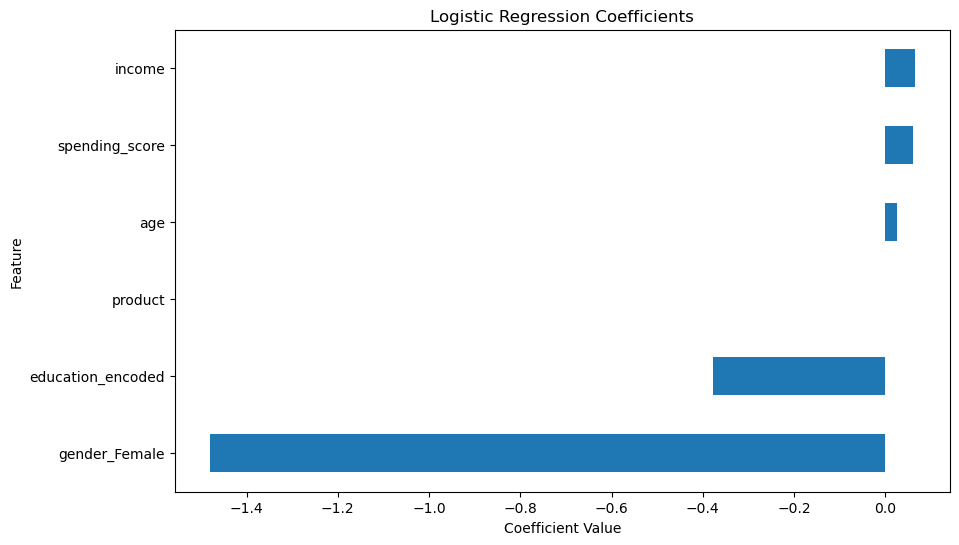

In [176]:
# Get the coefficients from the logistic regression model
coefficients = pd.Series(log_reg.coef_[0], index=X_train.columns)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


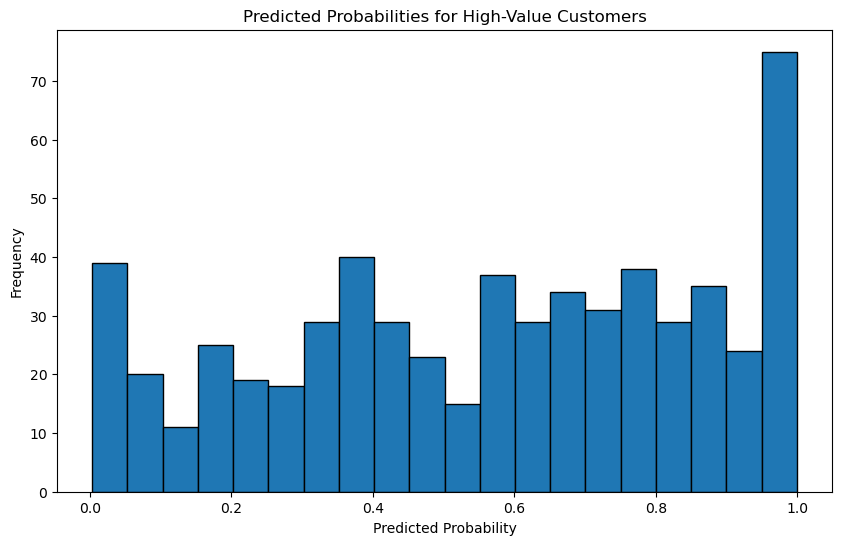

In [177]:
# Predict probabilities for the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for class 1 (high-value)

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=20, edgecolor='k')
plt.title("Predicted Probabilities for High-Value Customers")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


Results: The magnitude of the coefficients gives a sense of which features are most influential in the model's predictions. In this case, gender_Female, income, and spending_score seem to be the most impactful features, based on the size of their coefficients.
The model is relatively adequate at predicting low-value and high value customers
Further investigate the high negative co-efficient of females and improve the model

In [179]:
# Create interaction terms to improve the logistic regression model
X['gender_income'] = X['gender_Female'] * X['income']
X['gender_spending_score'] = X['gender_Female'] * X['spending_score']
X['income_spending_score'] = X['income'] * X['spending_score']

# Include these interaction terms in your model
X_interactions = X[['income', 'spending_score', 'gender_Female', 'education_encoded', 'gender_income', 'gender_spending_score', 'income_spending_score']]

# Train-test split
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interactions, y_binary, test_size=0.3, random_state=42)

# Train logistic regression with interactions
log_reg_interactions = LogisticRegression(random_state=42)
log_reg_interactions.fit(X_train_int, y_train_int)

# Evaluate the model with interaction terms
y_pred_int = log_reg_interactions.predict(X_test_int)

# Performance metrics
accuracy_int = accuracy_score(y_test_int, y_pred_int)
precision_int = precision_score(y_test_int, y_pred_int)
recall_int = recall_score(y_test_int, y_pred_int)

print(f"Accuracy with Interactions: {accuracy_int}")
print(f"Precision with Interactions: {precision_int}")
print(f"Recall with Interactions: {recall_int}")


Accuracy with Interactions: 0.8733333333333333
Precision with Interactions: 0.8452722063037249
Recall with Interactions: 0.9305993690851735


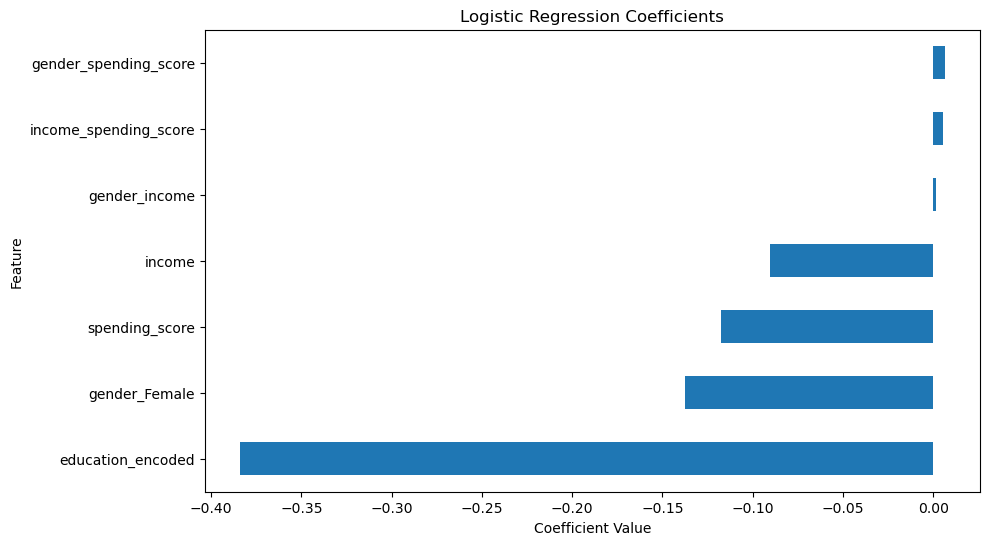

In [180]:
# Get the coefficients from the logistic regression model
coefficients = pd.Series(log_reg_interactions.coef_[0], index=X_train_int.columns)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


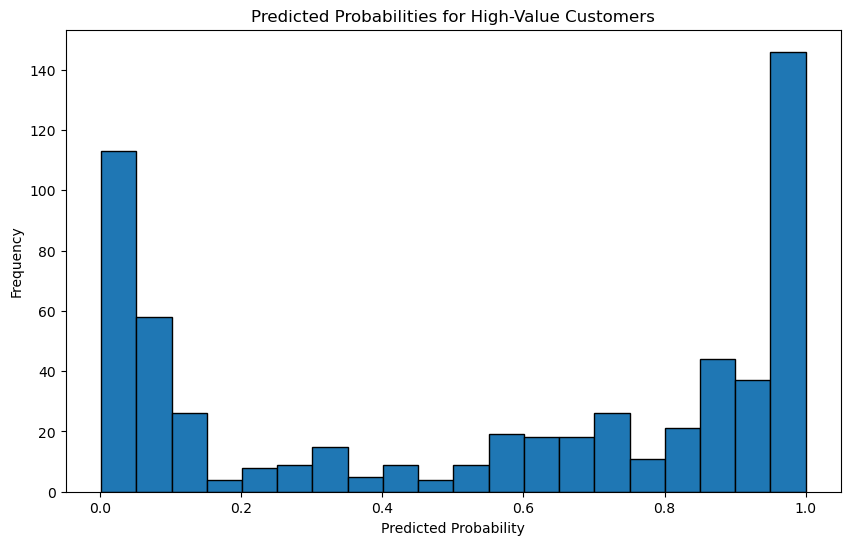

In [181]:
# Recreate the interaction terms for the test set
X_test['gender_income'] = X_test['gender_Female'] * X_test['income']
X_test['gender_spending_score'] = X_test['gender_Female'] * X_test['spending_score']
X_test['income_spending_score'] = X_test['income'] * X_test['spending_score']

# Ensure the order of columns in X_test matches that of the training data
X_test_interactions = X_test[['income', 'spending_score', 'gender_Female', 'education_encoded', 
                              'gender_income', 'gender_spending_score', 'income_spending_score']]

# Predict probabilities for the test set using the model trained with interaction terms
y_prob = log_reg_interactions.predict_proba(X_test_interactions)[:, 1]  # Probability for class 1 (high-value)

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=20, edgecolor='k')
plt.title("Predicted Probabilities for High-Value Customers")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


Adding interaction terms significantly improved the logistic regression model in predicting low-value and high-value customers. This suggests that the interactions between the features are important for accurately classifying high-value customers.

- education has the largest positive value, indicating that higher education levels now contribute positively to the likelihood of being classified as a high-value customer. This is a reversal from the earlier analysis, where education had a negative impact. This shift may suggest that in the presence of interactions, the relationship between education and customer value changes.
- gender and income - The positive coefficient for gender_income suggests that female customers with higher income are more likely to be high-value customers. This interaction effect captures the combined influence of gender and income, showing that income plays a stronger role for female customers.
- income and spending score - This coefficient is relatively small but positive, indicating that customers with higher income and higher spending scores are more likely to be high-value customers. The interaction between these two important features strengthens their combined impact.

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [185]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [186]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [187]:
# Drop unnecessary columns.


# View DataFrame.


In [188]:
# Explore the data.


In [189]:
# Descriptive statistics.


## 2. Plot

In [191]:
# Create a scatterplot with Seaborn.


In [192]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [194]:
# Determine the number of clusters: Elbow method.


In [195]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [198]:
# Apply the final model.


In [199]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [201]:
# Visualising the clusters.


# View the DataFrame.


In [202]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [207]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 